# Lloyds Banking Group Data Cleaning and EDA

Tasks:

Identify and gather data:

Review the provided data sources and select those most relevant for predicting customer churn. Focus on key areas such as customer demographics, transaction history, and customer service interactions.
Document your selection criteria and rationale for choosing each data set, ensuring that the data will provide meaningful insights into customer behaviour.

Perform EDA:

Use statistical techniques and data visualisation tools to explore the data sets. Create visualisations such as histograms, scatter plots, and box plots to understand distributions, trends, and relationships between variables.
Identify key features that may influence customer churn, paying special attention to patterns or anomalies that could be significant.
Clean and preprocess the data:

Handle missing values by choosing appropriate methods such as imputation, removal, or flagging. Justify your chosen method based on the data and context.
Detect and address outliers that could skew the analysis or predictions. Decide whether to cap, transform, or remove outliers based on their nature and potential impact.
Standardise or normalise numerical features to ensure consistent scales across variables. This step is crucial for preparing the data for machine learning algorithms.
Encode categorical variables using techniques like one-hot encoding to transform them into a numerical form appropriate for analysis.

Deliverable:

File submission: Submit a comprehensive report detailing your data gathering, EDA, and data cleaning processes. The report should include:
A summary of the data sets selected and the rationale for their inclusion
Visualisations and statistical summaries from the EDA
A description of the data cleaning and preprocessing steps taken
The cleaned and preprocessed data set ready for model building
Ensure that your report is clear, concise, and well-organised, as it will be a key component of the project's success, guiding future analysis and model development.

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the Dataset
customer_demographics_data = pd.read_excel('/content/Customer_Churn_Data_Large.xlsx', sheet_name = 'Customer_Demographics')
transaction_history_data = pd.read_excel('/content/Customer_Churn_Data_Large.xlsx', sheet_name = 'Transaction_History')
customer_service_data = pd.read_excel('/content/Customer_Churn_Data_Large.xlsx', sheet_name = 'Customer_Service')
online_activity_data = pd.read_excel('/content/Customer_Churn_Data_Large.xlsx', sheet_name = 'Online_Activity')
churn_status_data = pd.read_excel('/content/Customer_Churn_Data_Large.xlsx', sheet_name = 'Churn_Status')

In [3]:
customer_demographics_data.head()

CustomerID  Age Gender MaritalStatus IncomeLevel
0           1   62      M        Single         Low
1           2   65      M       Married         Low
2           3   18      M        Single         Low
3           4   21      M       Widowed         Low
4           5   21      M      Divorced      Medium

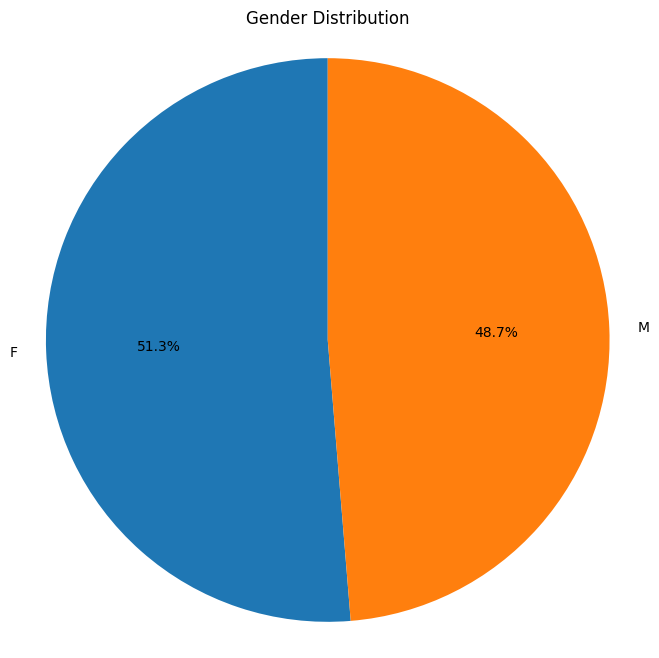

In [4]:
plt.figure(figsize = (8,8))
plt.pie(customer_demographics_data['Gender'].value_counts(), labels = customer_demographics_data['Gender'].value_counts().index, autopct = '%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

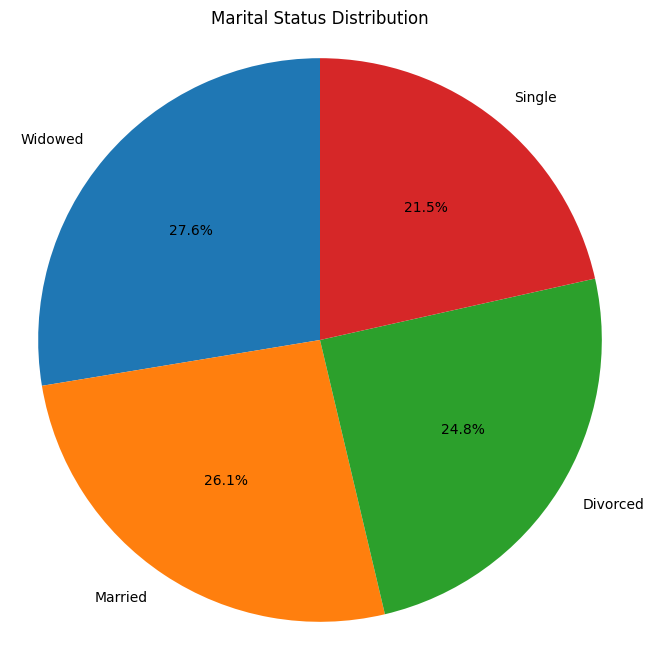

In [5]:
plt.figure(figsize = (8, 8))
plt.pie(customer_demographics_data['MaritalStatus'].value_counts(), labels = customer_demographics_data['MaritalStatus'].value_counts().index, autopct = '%1.1f%%', startangle=90)
plt.title('Marital Status Distribution')
plt.axis('equal')
plt.show()

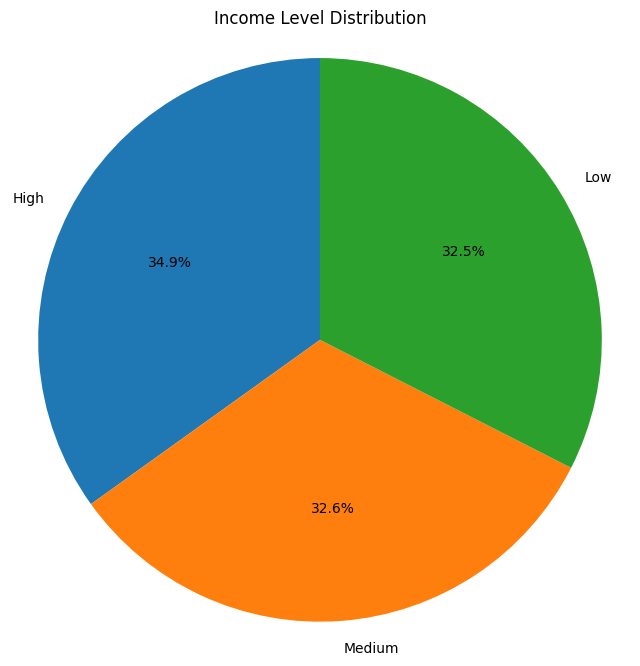

In [6]:
plt.figure(figsize = (8,8))
plt.pie(customer_demographics_data['IncomeLevel'].value_counts(), labels= customer_demographics_data['IncomeLevel'].value_counts().index, autopct = '%1.1f%%', startangle=90)
plt.title('Income Level Distribution')
plt.axis('equal')
plt.show()

In [7]:
transaction_history_data.head()

CustomerID  TransactionID TransactionDate  AmountSpent ProductCategory
0           1           7194      2022-03-27       416.50     Electronics
1           2           7250      2022-08-08        54.96        Clothing
2           2           9660      2022-07-25       197.50     Electronics
3           2           2998      2022-01-25       101.31       Furniture
4           2           1228      2022-07-24       397.37        Clothing

In [8]:
transaction_history_data.info()
transaction_history_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       5054 non-null   int64         
 1   TransactionID    5054 non-null   int64         
 2   TransactionDate  5054 non-null   datetime64[ns]
 3   AmountSpent      5054 non-null   float64       
 4   ProductCategory  5054 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 197.6+ KB


CustomerID  TransactionID                TransactionDate  AmountSpent
count  5054.000000    5054.000000                           5054  5054.000000
mean    501.424218    5510.538979  2022-07-01 19:25:37.158686208   250.707351
min       1.000000    1000.000000            2022-01-01 00:00:00     5.180000
25%     251.000000    3242.000000            2022-04-03 00:00:00   127.105000
50%     506.000000    5530.000000            2022-07-01 00:00:00   250.525000
75%     749.000000    7680.750000            2022-09-29 00:00:00   373.412500
max    1000.000000    9997.000000            2022-12-31 00:00:00   499.860000
std     285.172780    2582.088012                            NaN   142.250838

In 2022, there are 5054 transactions.



In [9]:
product_category_data = transaction_history_data['ProductCategory'].value_counts()
product_category_data

ProductCategory
Books          1041
Groceries      1020
Electronics    1001
Clothing       1000
Furniture       992
Name: count, dtype: int64

We can observe that the most purchase was books and groceries.

In [10]:
productcategory_amountspent_pt = pd.pivot_table(transaction_history_data, values = 'AmountSpent', index = 'ProductCategory', aggfunc = 'sum')
productcategory_amountspent_pt.sort_values(by = 'AmountSpent', ascending = False, inplace = True)
productcategory_amountspent_pt

AmountSpent
ProductCategory             
Groceries          261133.65
Books              259564.99
Clothing           252450.70
Electronics        249139.79
Furniture          244785.82

Although, the books comes at the top for the most expenditure and most purchase, the groceries have the highest amount of expenditure.

In [11]:
customer_service_data.head()

CustomerID  InteractionID InteractionDate InteractionType ResolutionStatus
0           1           6363      2022-03-31         Inquiry         Resolved
1           2           3329      2022-03-17         Inquiry         Resolved
2           3           9976      2022-08-24         Inquiry         Resolved
3           4           7354      2022-11-18         Inquiry         Resolved
4           4           5393      2022-07-03         Inquiry       Unresolved

In [12]:
#there are different types of interactivetype
customer_service_data['InteractionType'].value_counts()

InteractionType
Feedback     360
Complaint    335
Inquiry      307
Name: count, dtype: int64

There are 335 complaints.

In [13]:
#a pivot table of the interactiontype and resolutionstatus (Resolved and Unresolved)
interactiontype_resolutionstatus_pt = pd.pivot_table(customer_service_data, values = 'CustomerID', index = 'InteractionType', columns = 'ResolutionStatus', aggfunc = 'count', fill_value = 0)
interactiontype_resolutionstatus_pt

ResolutionStatus  Resolved  Unresolved
InteractionType                       
Complaint              156         179
Feedback               199         161
Inquiry                168         139

  InteractionType ResolutionStatus  Count
0       Complaint         Resolved    156
1        Feedback         Resolved    199
2         Inquiry         Resolved    168
3       Complaint       Unresolved    179
4        Feedback       Unresolved    161
5         Inquiry       Unresolved    139


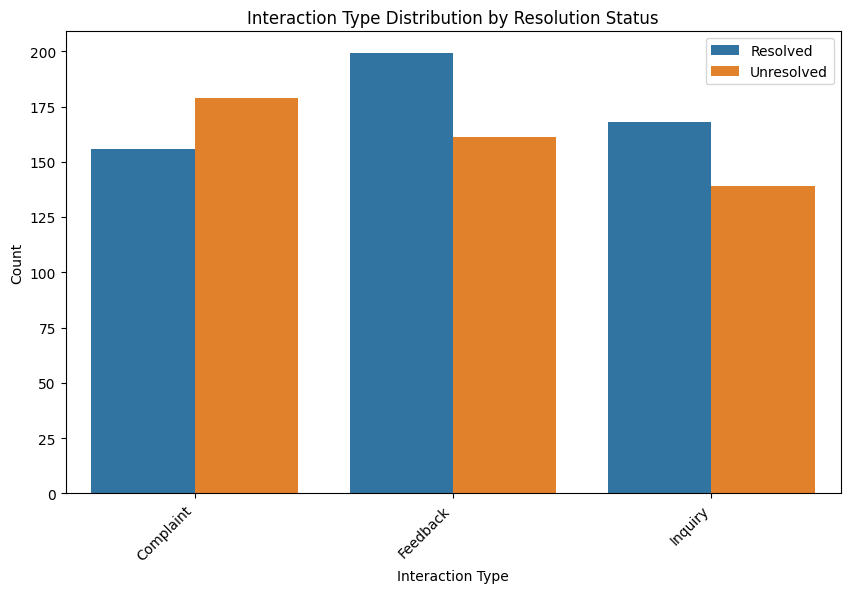

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))  # Create a single subplot

# Melt the DataFrame to combine 'Resolved' and 'Unresolved' columns
melted_data = pd.melt(interactiontype_resolutionstatus_pt.reset_index(),
                      id_vars=['InteractionType'],
                      value_vars=['Resolved', 'Unresolved'],
                      var_name='ResolutionStatus',
                      value_name='Count')

print(melted_data)

# Plot the side-by-side bars using 'hue'
sns.barplot(x='InteractionType',
            y='Count',
            hue='ResolutionStatus',
            data=melted_data,
            ax=ax)

plt.title('Interaction Type Distribution by Resolution Status')
plt.xlabel('Interaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

There are 179 unresolved complaints, 161 unresolved feeback, and 139 unresolved inquiries in 2022.

In [15]:
#checked whose ResolutionStatus was not resolved
non_resolved_customers = customer_service_data[customer_service_data['ResolutionStatus'] != 'Resolved']['CustomerID']
#non_resolved_customers.drop_duplicates().to_list()

In [16]:
customer_service_data.info()
customer_service_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        1002 non-null   int64         
 1   InteractionID     1002 non-null   int64         
 2   InteractionDate   1002 non-null   datetime64[ns]
 3   InteractionType   1002 non-null   object        
 4   ResolutionStatus  1002 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 39.3+ KB


CustomerID  InteractionID                InteractionDate
count  1002.000000    1002.000000                           1002
mean    485.209581    5952.887226  2022-07-02 19:28:22.994011904
min       1.000000    2015.000000            2022-01-01 00:00:00
25%     238.250000    3991.500000            2022-04-07 00:00:00
50%     474.500000    5911.500000            2022-07-02 12:00:00
75%     735.750000    7908.250000            2022-09-30 00:00:00
max     995.000000    9997.000000            2022-12-30 00:00:00
std     287.030259    2305.819681                            NaN

In [17]:
online_activity_data.head()

CustomerID LastLoginDate  LoginFrequency ServiceUsage
0           1    2023-10-21              34   Mobile App
1           2    2023-12-05               5      Website
2           3    2023-11-15               3      Website
3           4    2023-08-25               2      Website
4           5    2023-10-27              41      Website

We have to investigate which service usage are most commonly used, and also we have to check the distribution of the login frequency.

In [18]:
service_usage_data = online_activity_data['ServiceUsage'].value_counts()
service_usage_data

ServiceUsage
Online Banking    349
Mobile App        342
Website           309
Name: count, dtype: int64

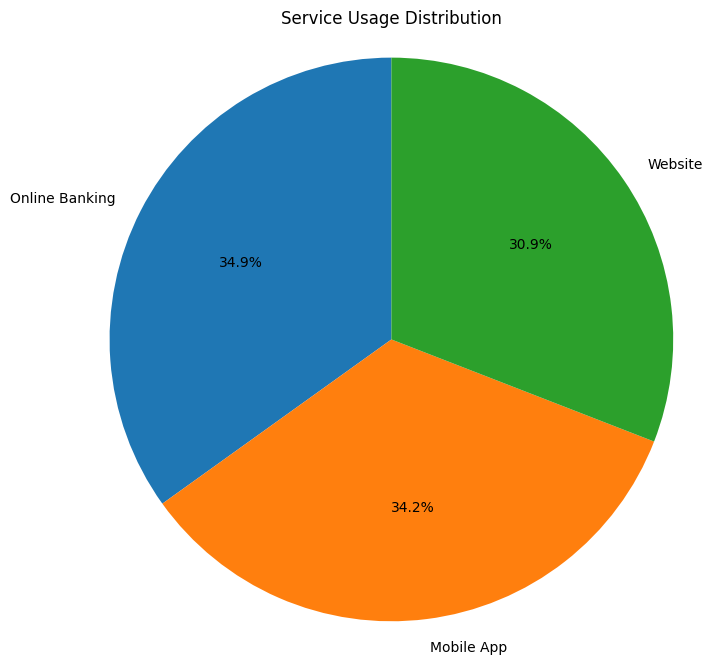

In [19]:
plt.figure(figsize = (8,8))
plt.pie(service_usage_data, labels = service_usage_data.index, autopct = '%1.1f%%', startangle=90)
plt.title('Service Usage Distribution')
plt.axis('equal')
plt.show()

In [20]:
online_activity_data.info()
online_activity_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerID      1000 non-null   int64         
 1   LastLoginDate   1000 non-null   datetime64[ns]
 2   LoginFrequency  1000 non-null   int64         
 3   ServiceUsage    1000 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 31.4+ KB


CustomerID        LastLoginDate  LoginFrequency
count  1000.000000                 1000     1000.000000
mean    500.500000  2023-07-05 21:28:48       25.912000
min       1.000000  2023-01-01 00:00:00        1.000000
25%     250.750000  2023-04-08 00:00:00       13.750000
50%     500.500000  2023-07-10 12:00:00       27.000000
75%     750.250000  2023-10-01 06:00:00       38.000000
max    1000.000000  2023-12-31 00:00:00       49.000000
std     288.819436                  NaN       14.055953

In [21]:
churn_status_data.head()

CustomerID  ChurnStatus
0           1            0
1           2            1
2           3            0
3           4            0
4           5            0

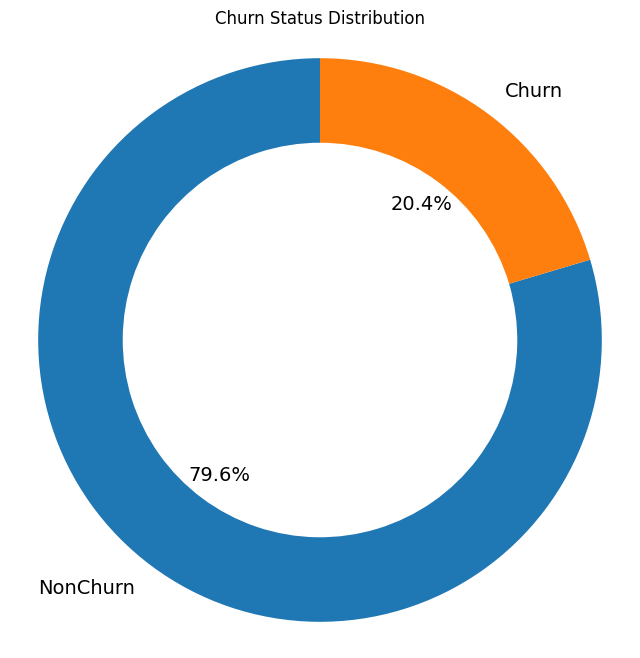

In [22]:
# Plotting the churn status distribution
churn_counts = churn_status_data['ChurnStatus'].value_counts()

# Create the donut chart
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=['NonChurn', 'Churn'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))  # Adjust width for donut thickness
plt.title('Churn Status Distribution')

# Customize autopct position and text size
centre_circle = plt.Circle((0, 0), 0.60, fc='white') # Adjust 0.60 for circle size
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set text properties for better readability
for text in plt.gca().texts:
    text.set_fontsize(14)  # Increase font size

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


To investigate more about the case:
- we have to observe the trend, we need to know the distribution of those who are churn status.

In [23]:
number_of_churn = churn_status_data['ChurnStatus'].value_counts()
print(number_of_churn)
#we observe that there are 204 churns and 796 no churns in 2022
#therefore, we need to investigate the people who have churned based on their CustomerID

#churn rate: 20.4%
churn_rate = (number_of_churn[1] / (number_of_churn[0] + number_of_churn[1])) * 100
print(f"The churn rate: {churn_rate}")

churned_customers = churn_status_data[churn_status_data['ChurnStatus'] == 1]['CustomerID']
print(f"These are the customers who have churned: {churned_customers.tolist()}")

ChurnStatus
0    796
1    204
Name: count, dtype: int64
The churn rate: 20.4
These are the customers who have churned: [2, 8, 10, 16, 18, 26, 33, 41, 46, 51, 61, 68, 71, 72, 73, 75, 76, 79, 81, 100, 104, 107, 108, 110, 111, 119, 122, 123, 128, 137, 144, 160, 164, 168, 170, 174, 176, 183, 190, 197, 201, 213, 217, 221, 227, 230, 231, 234, 236, 237, 238, 239, 242, 248, 251, 252, 254, 260, 261, 262, 271, 272, 276, 282, 283, 286, 311, 315, 323, 335, 342, 351, 353, 358, 362, 365, 381, 385, 388, 389, 395, 396, 402, 404, 407, 411, 419, 422, 433, 441, 450, 462, 466, 469, 470, 478, 480, 482, 488, 491, 498, 506, 507, 509, 510, 511, 516, 518, 521, 530, 531, 537, 543, 545, 560, 562, 565, 574, 576, 577, 579, 586, 588, 589, 602, 605, 607, 614, 616, 617, 618, 619, 625, 627, 630, 641, 643, 644, 646, 650, 657, 658, 674, 677, 682, 685, 691, 695, 696, 699, 702, 716, 733, 742, 748, 753, 757, 762, 763, 775, 777, 782, 788, 789, 791, 799, 806, 807, 812, 823, 826, 827, 831, 836, 841, 848, 850, 857, 869, 899, 9

In [24]:
#compare find the customers whose inquiry were not resolved and churned
non_resolved_and_churned = churn_status_data[(churn_status_data['ChurnStatus'] == 1) & (customer_service_data['ResolutionStatus'] != 'Resolved')]['CustomerID']
non_resolved_and_churned.drop_duplicates().to_list()
len(non_resolved_and_churned.drop_duplicates())

99

There are 99 churned customers whose inquiry were not resolved

## Data Exploration and EDA

Merge the following data to the churn data based on churn_data
1. Customer_Demographics
2. Customer_Service
3. Online_Activity



In [25]:
merged_demographics_churn_data = pd.merge(customer_demographics_data, churn_status_data, on = 'CustomerID', how = 'left')
merged_demographics_churn_data.isnull().sum()

CustomerID       0
Age              0
Gender           0
MaritalStatus    0
IncomeLevel      0
ChurnStatus      0
dtype: int64

In [26]:
#create a age frequency column variable (<19', '20-29', '30-39', '40-49', '50+'
# merged_demographics_churn_data['AgeFrequency'] = pd.cut(merged_demographics_churn_data['Age'], bins = [18, 29, 39, 49, 59, np.inf], labels = ['<19', '20-29', '30-39', '40-49', '50+'])
# merged_demographics_churn_data['AgeFrequency'].value_counts()
# age_churn_pt = pd.pivot_table(merged_demographics_churn_data, values = 'ChurnStatus', index = 'AgeFrequency', aggfunc = 'sum')
# age_churn_pt

In [27]:
# plt.figure(figsize = (8,8))
# plt.pie(age_churn_pt['ChurnStatus'].values, labels = age_churn_pt.index, autopct = '%1.1f%%', startangle=90)
# plt.title('Age Frequency Distribution by ChurnStatus')
# plt.axis('equal')
# plt.show()

In [28]:
martial_churn_pt = pd.pivot_table(merged_demographics_churn_data, values = 'ChurnStatus', index = 'MaritalStatus', aggfunc = 'sum')
martial_churn_pt.sort_values(by = 'ChurnStatus', ascending= False)

ChurnStatus
MaritalStatus             
Married                 60
Widowed                 54
Divorced                46
Single                  44

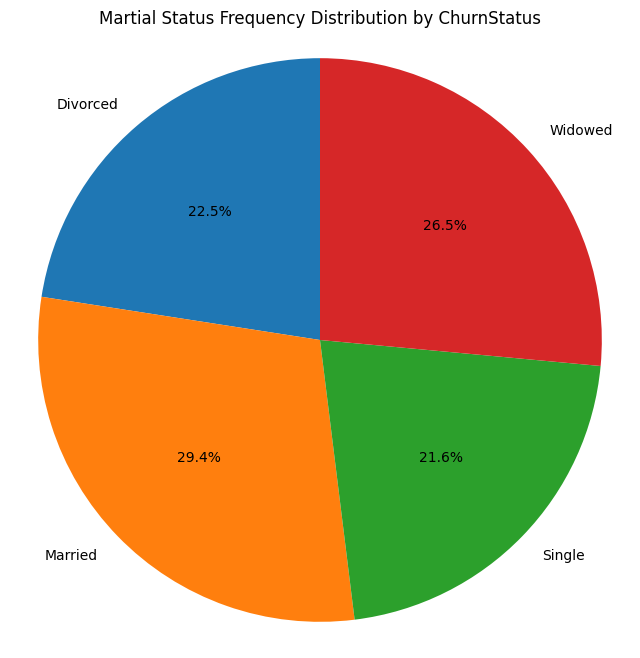

In [29]:
plt.figure(figsize = (8,8))
plt.pie(martial_churn_pt['ChurnStatus'].values, labels = martial_churn_pt.index, autopct = '%1.1f%%', startangle=90)
plt.title('Martial Status Frequency Distribution by ChurnStatus')
plt.axis('equal')
plt.show()

In [30]:
income_level_churn_pt = pd.pivot_table(merged_demographics_churn_data, values = 'ChurnStatus', index = 'IncomeLevel', aggfunc = 'sum')
income_level_churn_pt.sort_values(by = 'ChurnStatus', ascending = False)

ChurnStatus
IncomeLevel             
Low                   72
High                  67
Medium                65

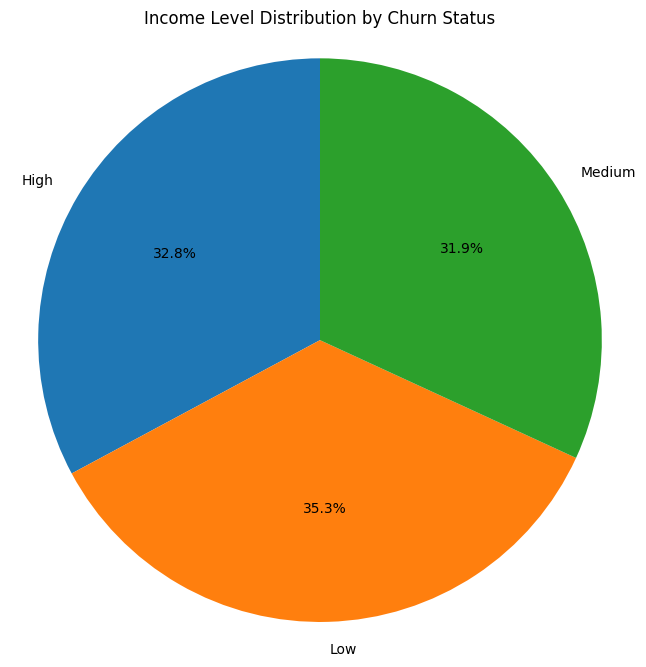

In [31]:
plt.figure(figsize = (8,8))
plt.pie(income_level_churn_pt['ChurnStatus'].values, labels = income_level_churn_pt.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Income Level Distribution by Churn Status')
plt.axis('equal')
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

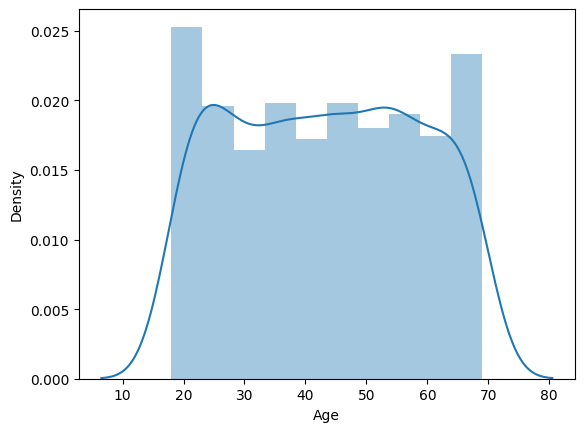

In [32]:
sns.distplot(merged_demographics_churn_data['Age'])

<Axes: xlabel='Gender', ylabel='ChurnStatus'>

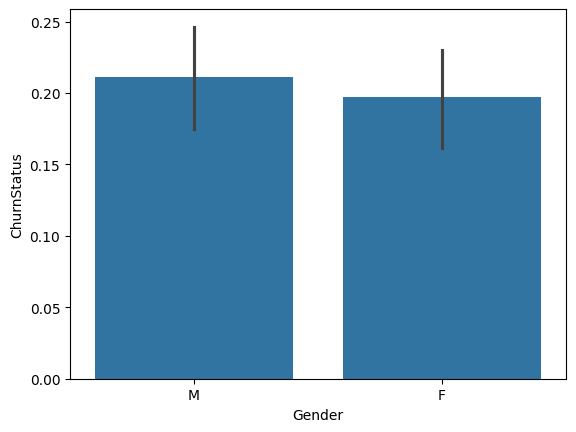

In [33]:
sns.barplot(x = 'Gender', y = 'ChurnStatus', data = merged_demographics_churn_data)

In [34]:
merged_customer_service_churn_data = pd.merge(customer_service_data, churn_status_data, on = 'CustomerID', how = 'left')
merged_customer_service_churn_data.isnull().sum()

CustomerID          0
InteractionID       0
InteractionDate     0
InteractionType     0
ResolutionStatus    0
ChurnStatus         0
dtype: int64

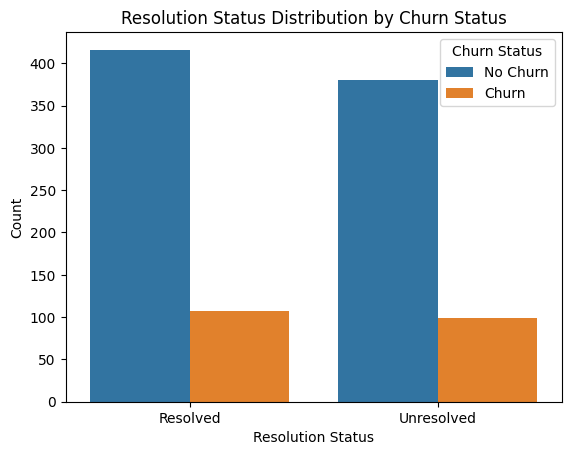

In [35]:
ax = sns.countplot(x = 'ResolutionStatus', hue = 'ChurnStatus', data = merged_customer_service_churn_data)
plt.title('Resolution Status Distribution by Churn Status')
plt.xlabel('Resolution Status')
plt.ylabel('Count')
# Get the current legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Define the new labels
new_labels = ['No Churn', 'Churn']

# Set the new legend labels
ax.legend(handles, new_labels, title='Churn Status')
plt.show()

In [36]:
interaction_type_churn_pt = pd.pivot_table(merged_customer_service_churn_data, values = 'ChurnStatus', index = 'InteractionType', aggfunc = 'sum')
interaction_type_churn_pt.sort_values(by = 'ChurnStatus', ascending = False)

ChurnStatus
InteractionType             
Feedback                  76
Complaint                 72
Inquiry                   58

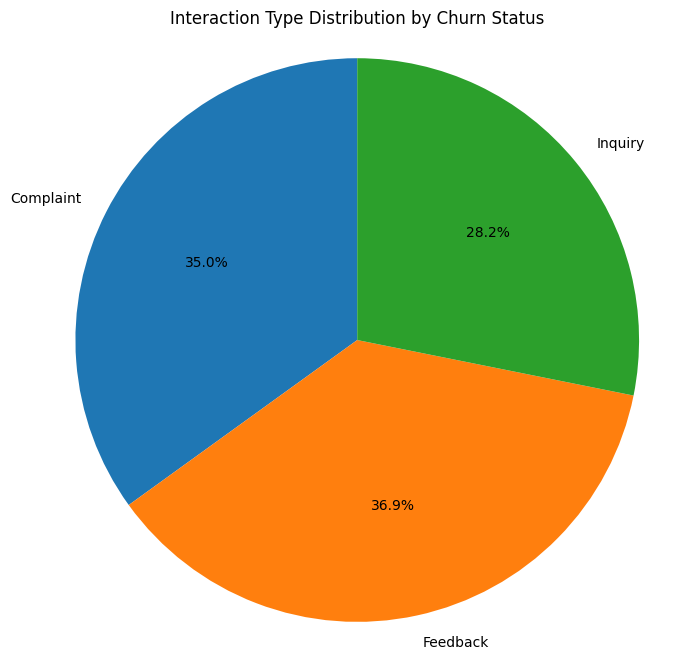

In [37]:
plt.figure(figsize = (8,8))
plt.pie(interaction_type_churn_pt['ChurnStatus'].values, labels = interaction_type_churn_pt.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Interaction Type Distribution by Churn Status')
plt.axis('equal')
plt.show()

In [38]:
merged_online_activity_churn_data = pd.merge(online_activity_data, churn_status_data, on = 'CustomerID', how = 'left')
merged_online_activity_churn_data.isnull().sum()

CustomerID        0
LastLoginDate     0
LoginFrequency    0
ServiceUsage      0
ChurnStatus       0
dtype: int64

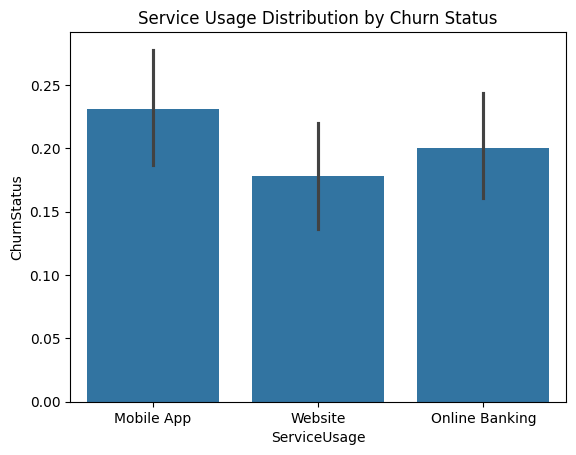

In [39]:
sns.barplot(x = 'ServiceUsage', y = 'ChurnStatus', data = merged_online_activity_churn_data)
plt.title('Service Usage Distribution by Churn Status')
plt.show()

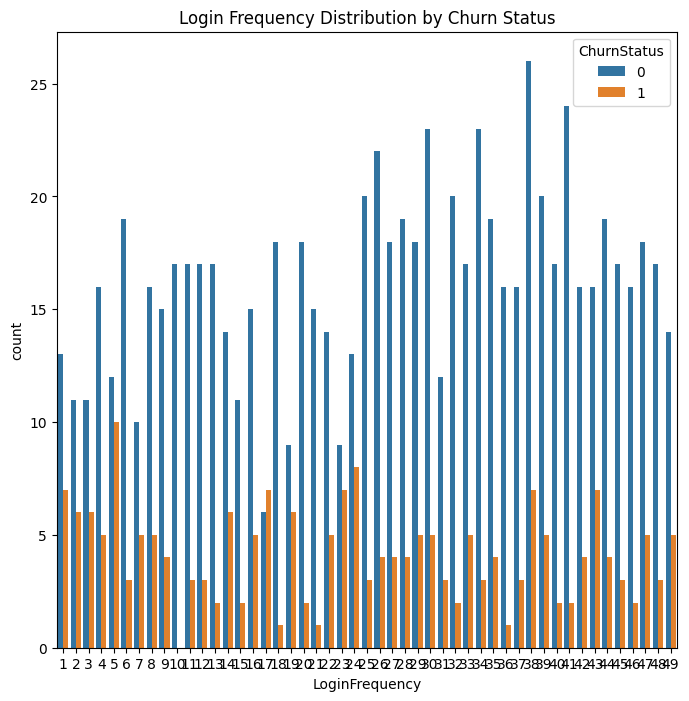

In [40]:
#We can explore the frequency at which the customer login in the banking app
plt.figure(figsize = (8,8))
sns.countplot(x = 'LoginFrequency', hue = 'ChurnStatus', data = merged_online_activity_churn_data)
plt.title('Login Frequency Distribution by Churn Status')
plt.show()

The login frquency of 5 times and 32 times is the highest in terms of the number of customers that churn.

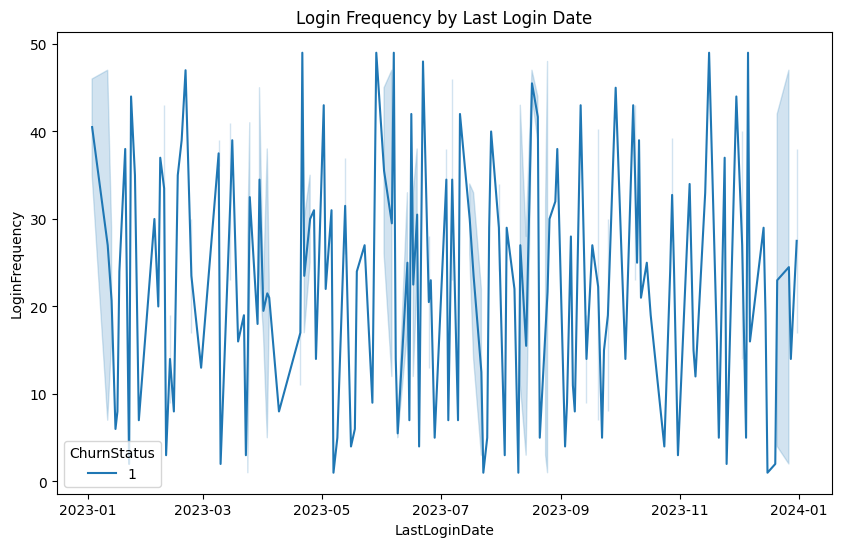

In [41]:
#we can explore the total of the login frequency by the lastlogindate using the line plot for only ChurnStatus == 1
plt.figure(figsize = (10,6))
sns.lineplot(x = 'LastLoginDate', y = 'LoginFrequency', hue = 'ChurnStatus', data = merged_online_activity_churn_data[merged_online_activity_churn_data['ChurnStatus'] == 1])
plt.title('Login Frequency by Last Login Date')
plt.show()

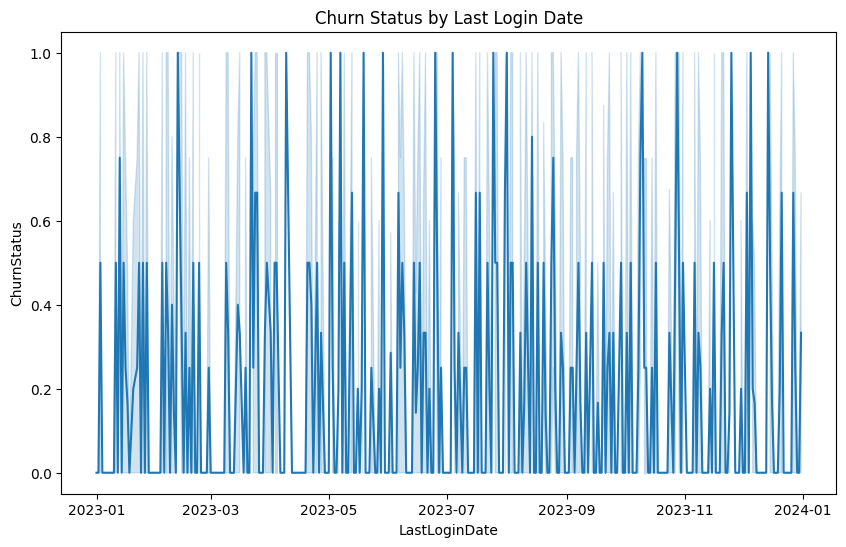

In [42]:
#The total number of churnstatus = 1 by last login date (line plot)
plt.figure(figsize = (10, 6))
sns.lineplot(x = 'LastLoginDate', y = 'ChurnStatus', data = merged_online_activity_churn_data)
plt.title('Churn Status by Last Login Date')
plt.show()

In [43]:
def recency(df):
  """
  Calculate the recency of each customer based on their last login date.
  """
  df['LastLoginDate'] = pd.to_datetime(df['LastLoginDate'])
  df['Recency'] = (df['LastLoginDate'].max() - df['LastLoginDate']).dt.days
  return df

recency_online_activity_churn_data = recency(merged_online_activity_churn_data)
print(f"The last login date is {recency_online_activity_churn_data['LastLoginDate'].max()}")
print(f"The highest recency is {recency_online_activity_churn_data['Recency'].max()}")
print(f"The lowest recency is {recency_online_activity_churn_data['Recency'].min()}")

#Average recency with churnstatus = 1
print(f"The average recency when customer churn is {round(recency_online_activity_churn_data[recency_online_activity_churn_data['ChurnStatus'] == 1]['Recency'].mean(), 2)}")
print(f"The average recency when customer does not churn is {round(recency_online_activity_churn_data[recency_online_activity_churn_data['ChurnStatus'] == 0]['Recency'].mean(), 2)}")

#median, Q1, Q3, interquartile for recency
print(f"The median recency is {round(recency_online_activity_churn_data['Recency'].median(), 2)}")
print(f"The Q1 recency is {round(recency_online_activity_churn_data['Recency'].quantile(0.25), 2)}")
print(f"The Q3 recency is {round(recency_online_activity_churn_data['Recency'].quantile(0.75), 2)}")
print(f"The interquartile recency is {round(recency_online_activity_churn_data['Recency'].quantile(0.75) - recency_online_activity_churn_data['Recency'].quantile(0.25), 2)}")

The last login date is 2023-12-31 00:00:00
The highest recency is 364
The lowest recency is 0
The average recency when customer churn is 179.98
The average recency when customer does not churn is 177.62
The median recency is 173.5
The Q1 recency is 90.75
The Q3 recency is 267.0
The interquartile recency is 176.25


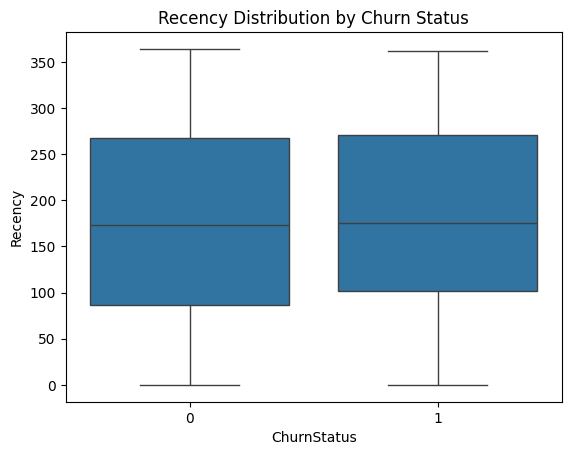

In [44]:
sns.boxplot(x = 'ChurnStatus', y = 'Recency', data = recency_online_activity_churn_data)
plt.title('Recency Distribution by Churn Status')
plt.show()

In [45]:
merged_transaction_history_churn_data = pd.merge(transaction_history_data, churn_status_data, on = 'CustomerID', how = 'left')
merged_transaction_history_churn_data.isnull().sum()

CustomerID         0
TransactionID      0
TransactionDate    0
AmountSpent        0
ProductCategory    0
ChurnStatus        0
dtype: int64

In [46]:
# create a treemap to observe the composition of sales by product categories
import plotly.express as px
product_category_sales_treemap = px.treemap(merged_transaction_history_churn_data, path = ['ProductCategory'], values = 'AmountSpent', title = 'Sales by Product Category')
product_category_sales_treemap.show()



In [47]:
#boxplot for each variable in comparison of ChurnStatus
def boxplot(df, col):
  for col in df.select_dtypes(include=['number']):  #Use select_dtypes for numerical columns
    if col != 'ChurnStatus':
      plt.figure(figsize = (10, 6))
      sns.boxplot(x = 'ChurnStatus', y = col, data = df)
      plt.title(f'{col} Distribution by Churn Status')
      plt.xlabel('Churn Status')
      plt.ylabel(col)
      plt.show()


def histogram_churn(df, col):
  for col in df.select_dtypes(include=['number']):  #Use select_dtypes for numerical columns
    if col != 'ChurnStatus':
      plt.figure(figsize = (10, 6))
      sns.histplot(x = col, hue = 'ChurnStatus', palette= "Oranges", data = df[df['ChurnStatus'] == 1], kde = True)
      plt.title(f'{col} Distribution by Churn Status')
      plt.xlabel(col)
      plt.ylabel('Count')
      plt.show()

def histogram_no_churn(df, col):
  for col in df.select_dtypes(include=['number']):  #Use select_dtypes for numerical columns
    if col != 'ChurnStatus':
      plt.figure(figsize = (10, 6))
      sns.histplot(x = col, hue = 'ChurnStatus', data = df[df['ChurnStatus'] == 0], kde = True)
      plt.title(f'{col} Distribution by Churn Status')
      plt.xlabel(col)
      plt.ylabel('Count')
      plt.show()

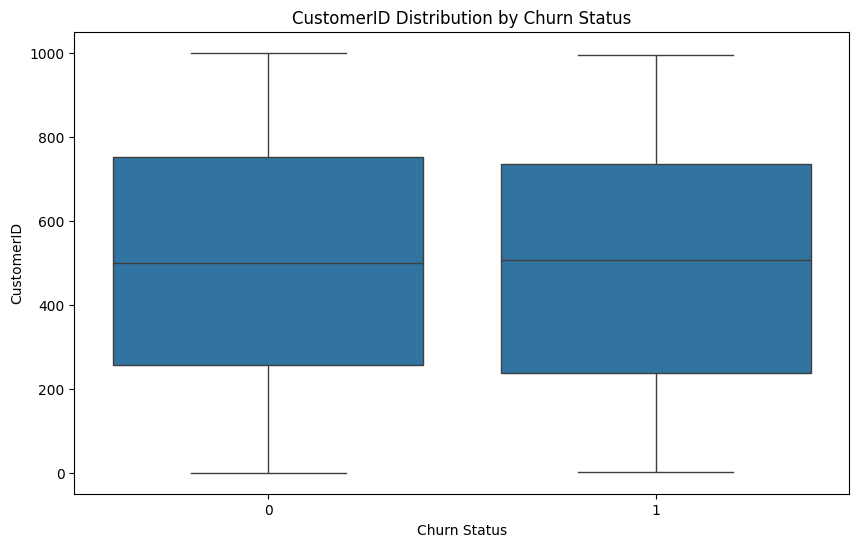

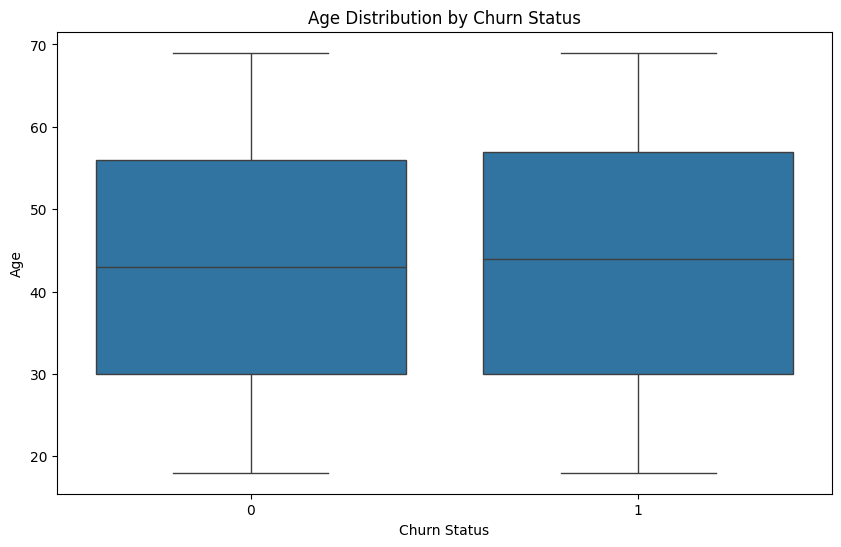

None


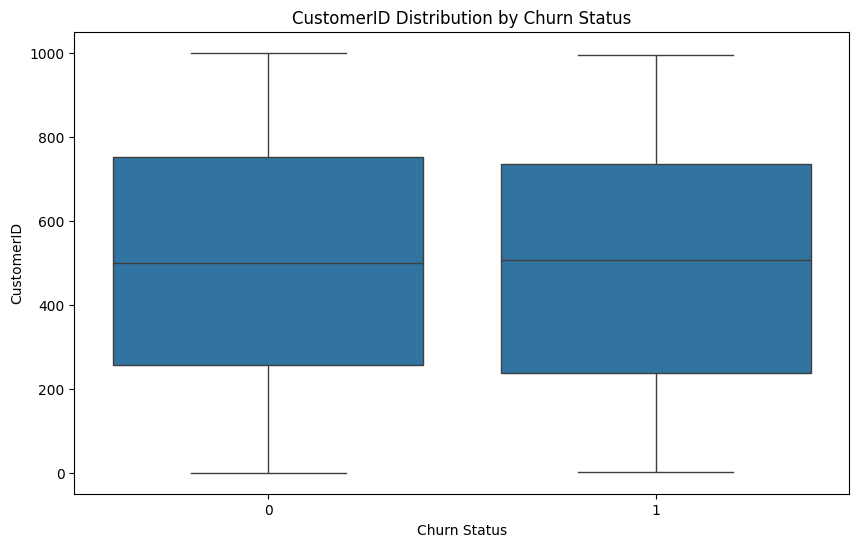

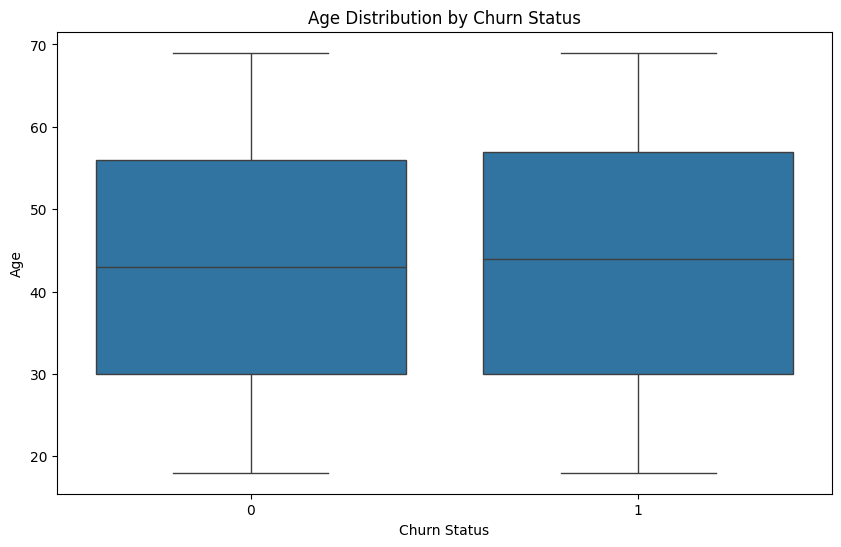

None


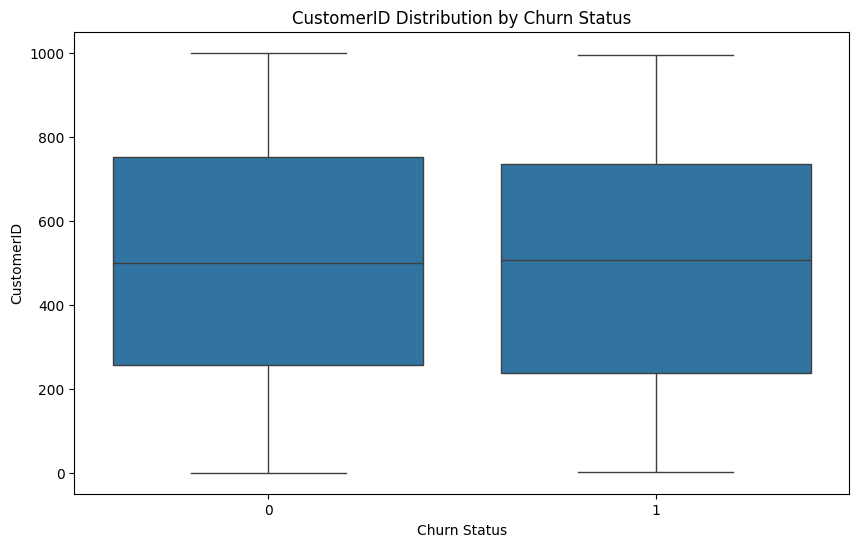

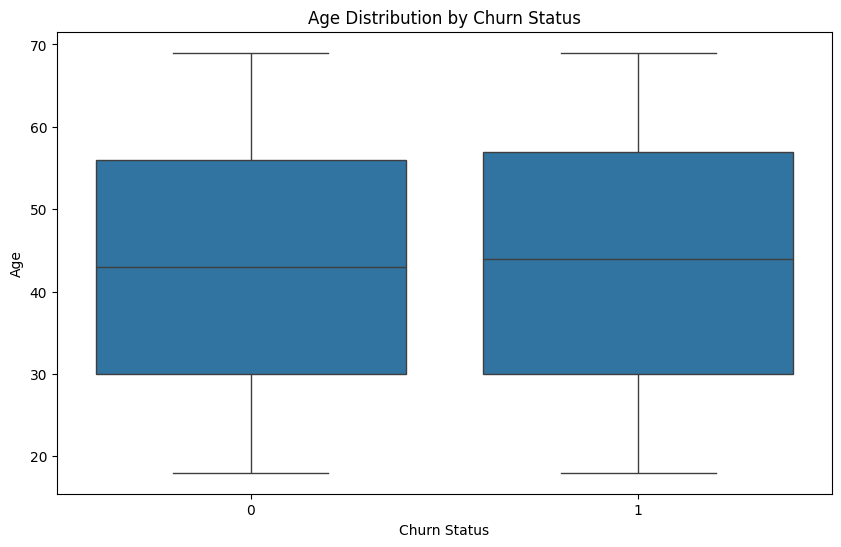

None


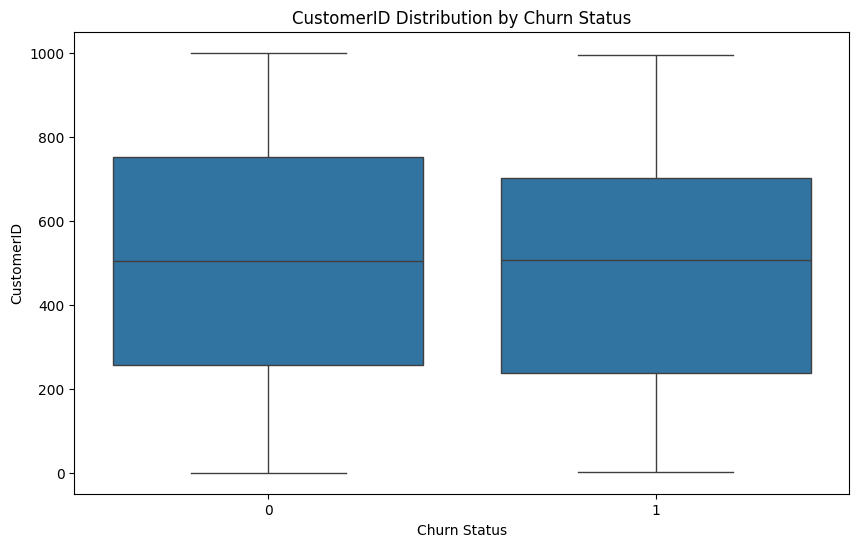

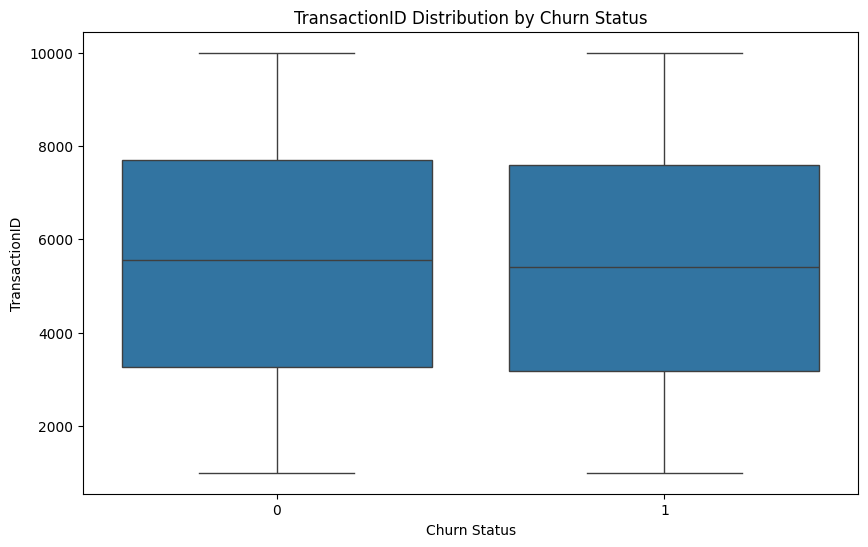

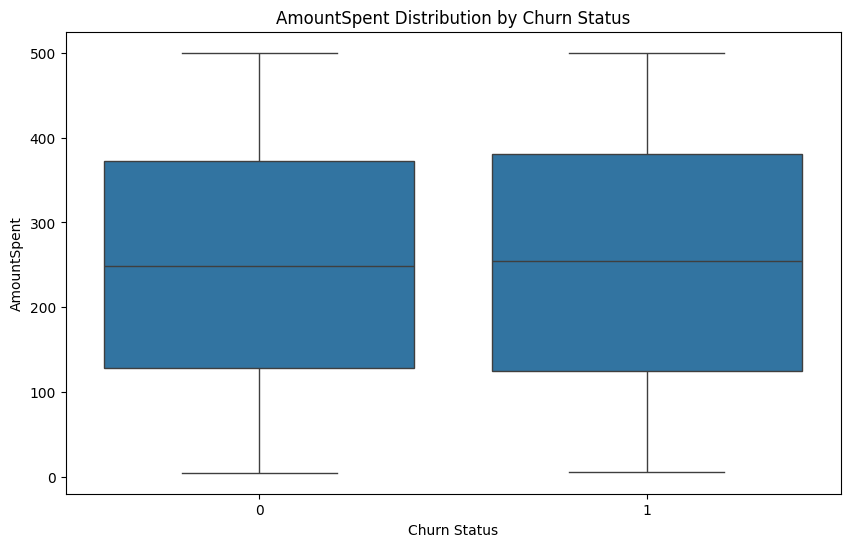

None


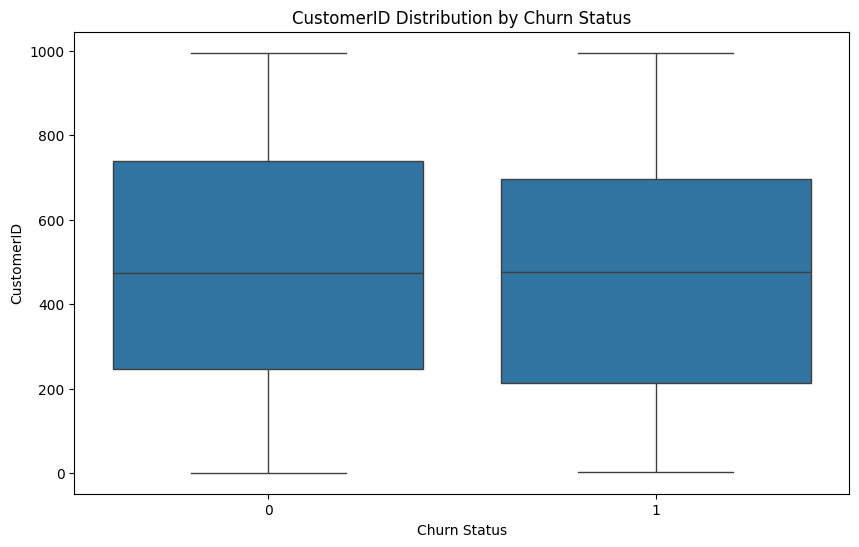

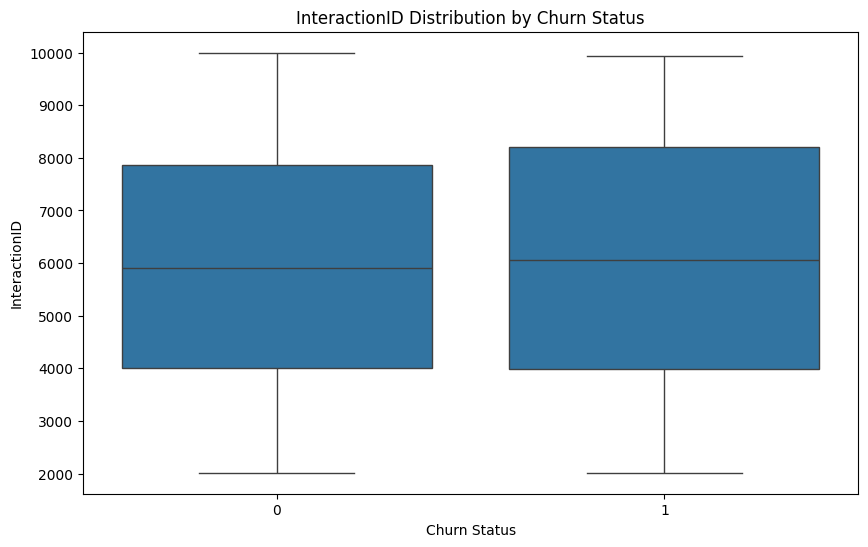

None


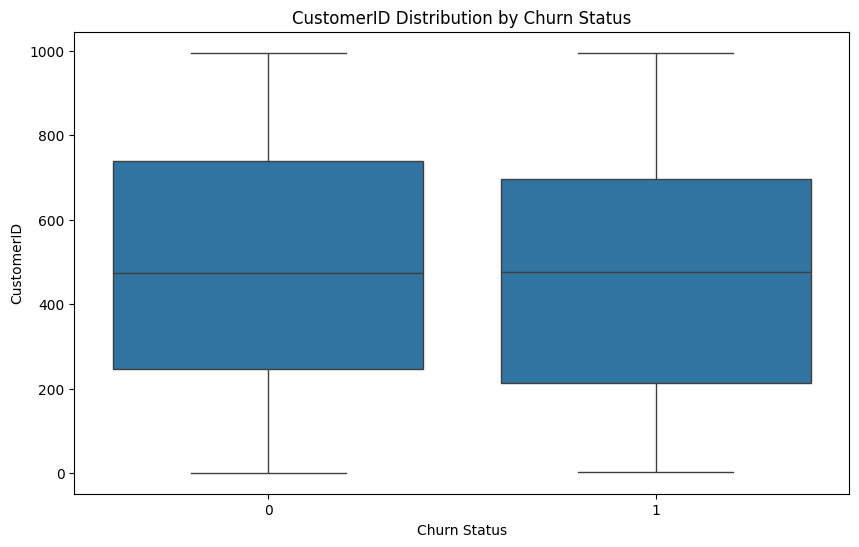

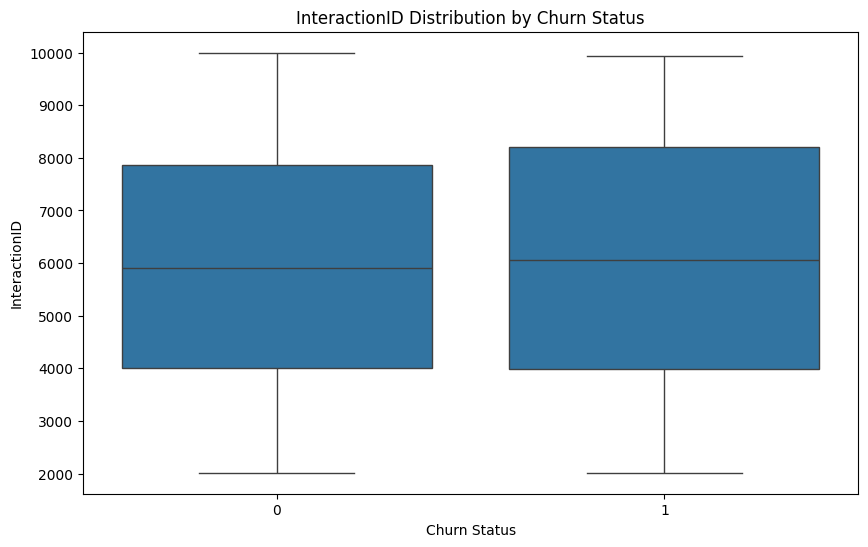

None


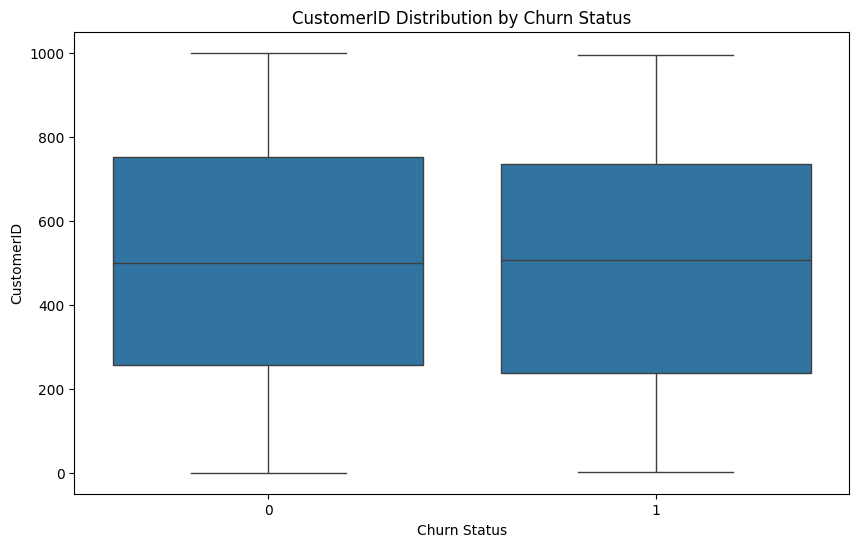

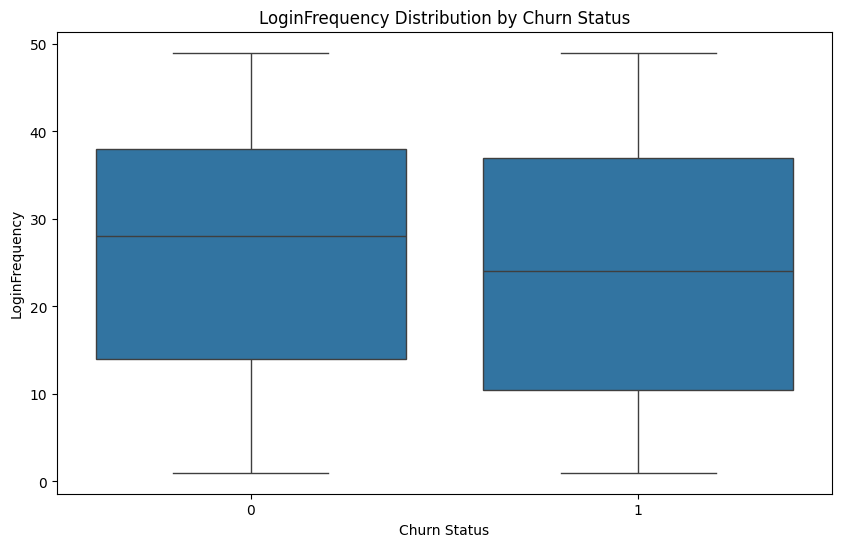

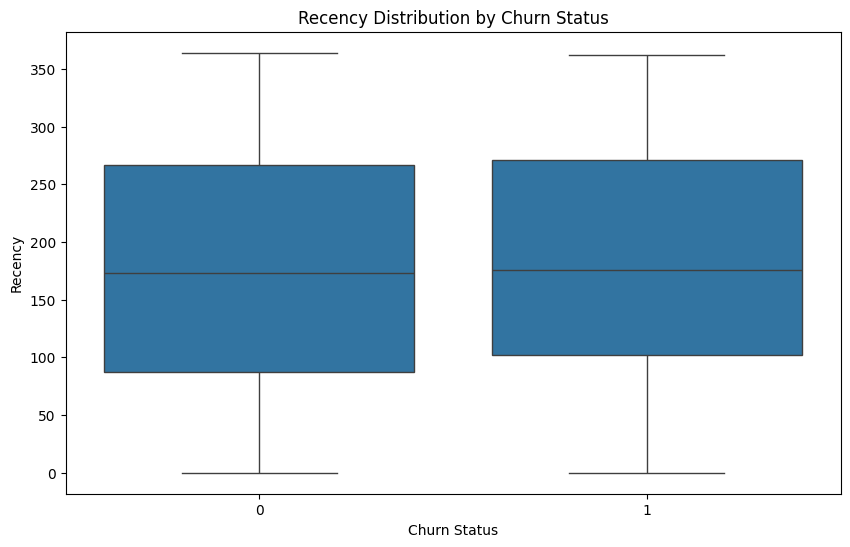

None


In [48]:
print(boxplot(merged_demographics_churn_data, 'Age'))
print(boxplot(merged_demographics_churn_data, 'IncomeLevel'))
print(boxplot(merged_demographics_churn_data, 'MaritalStatus'))
print(boxplot(merged_transaction_history_churn_data, 'AmountSpent'))
print(boxplot(merged_customer_service_churn_data, 'InteractionType'))
print(boxplot(merged_customer_service_churn_data, 'ResolutionStatus'))
print(boxplot(merged_online_activity_churn_data, 'ServiceUsage'))

There are no outliers for selected features against Churn Status.

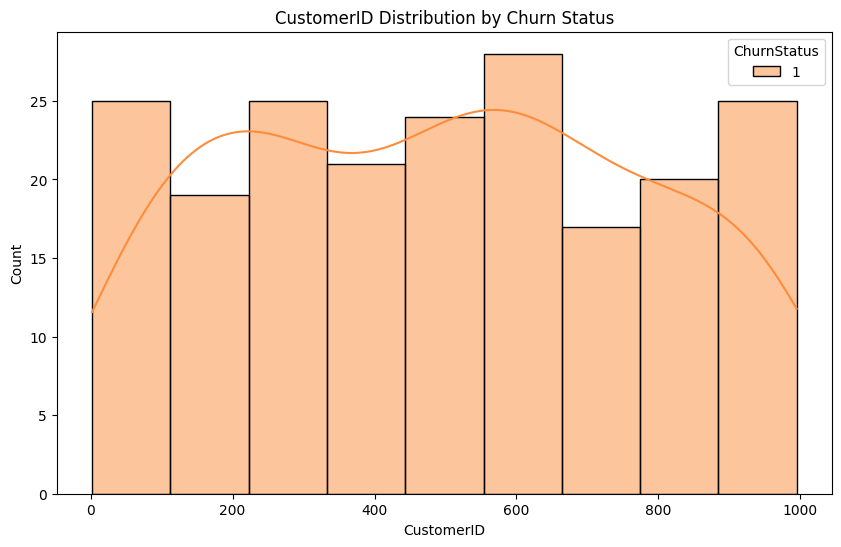

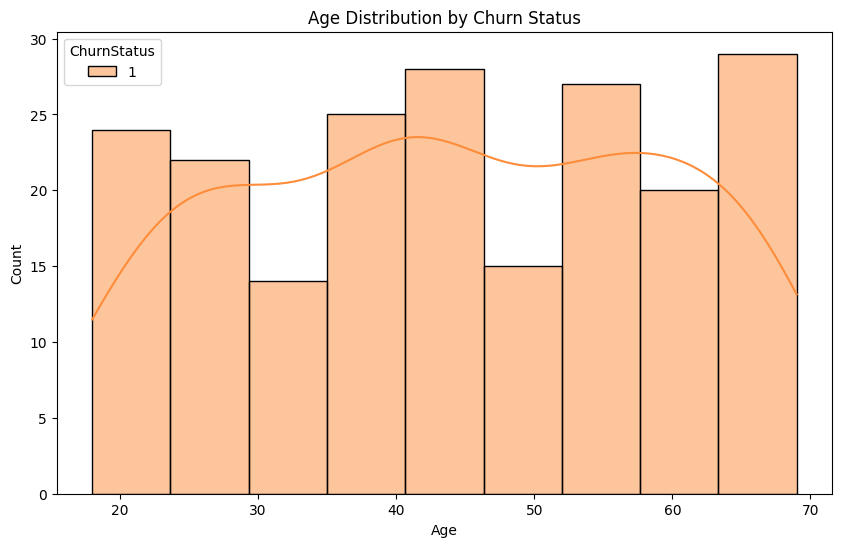

None


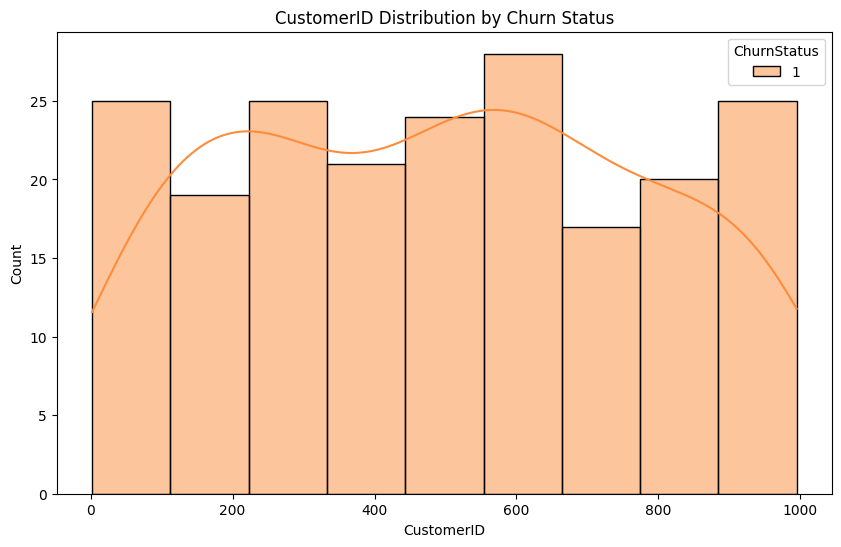

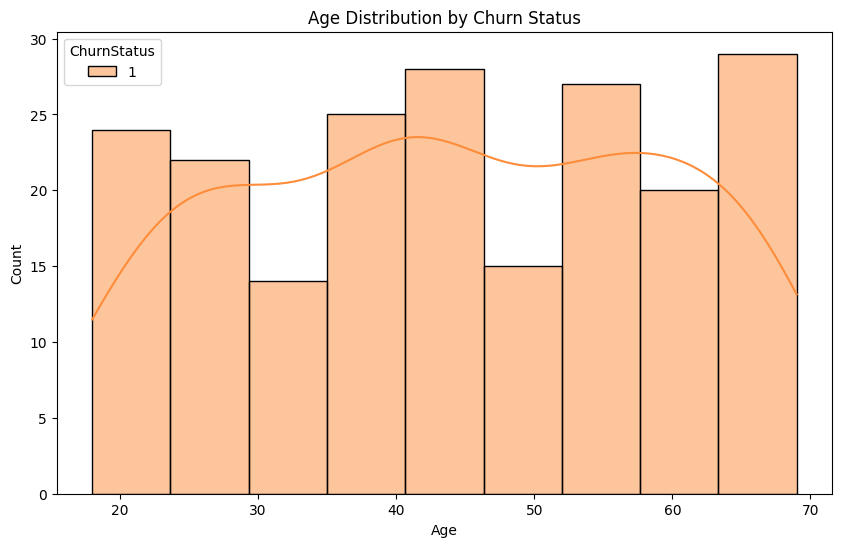

None


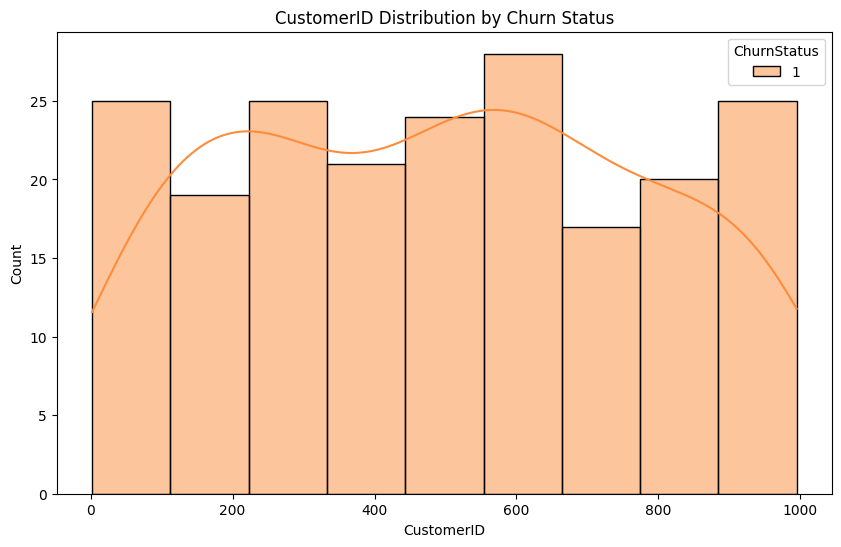

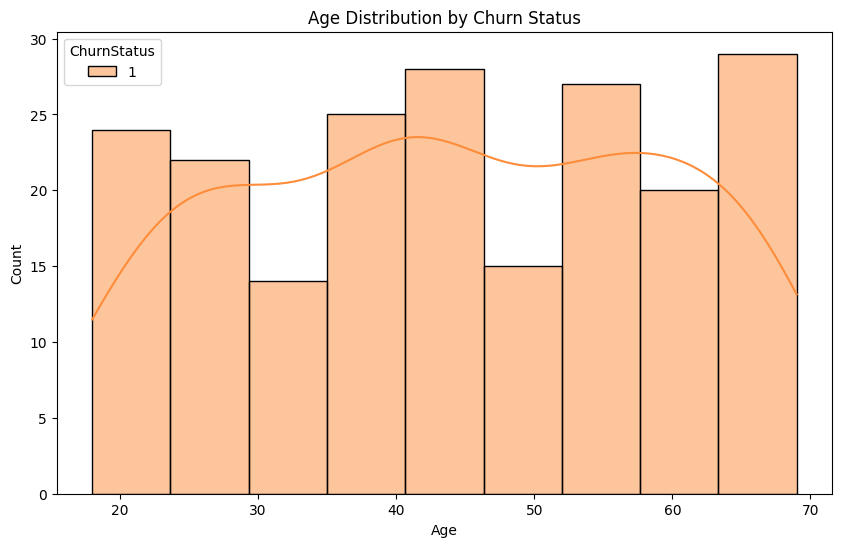

None


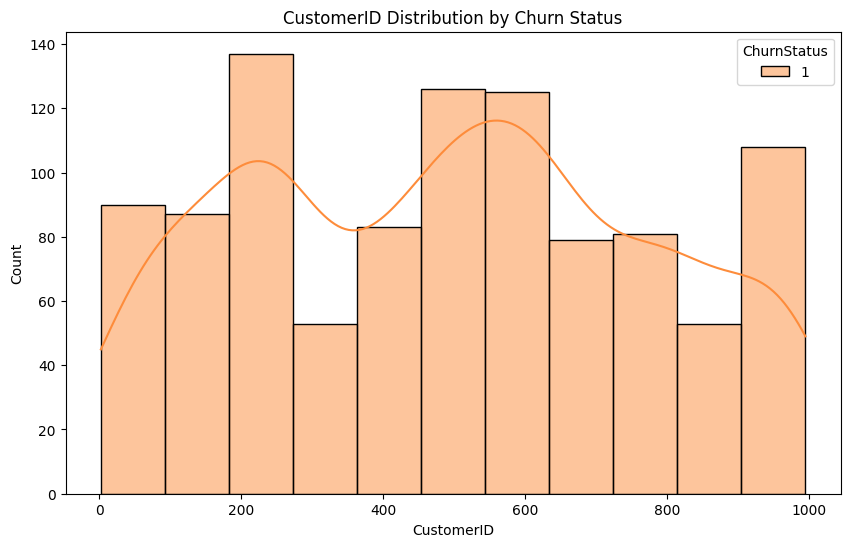

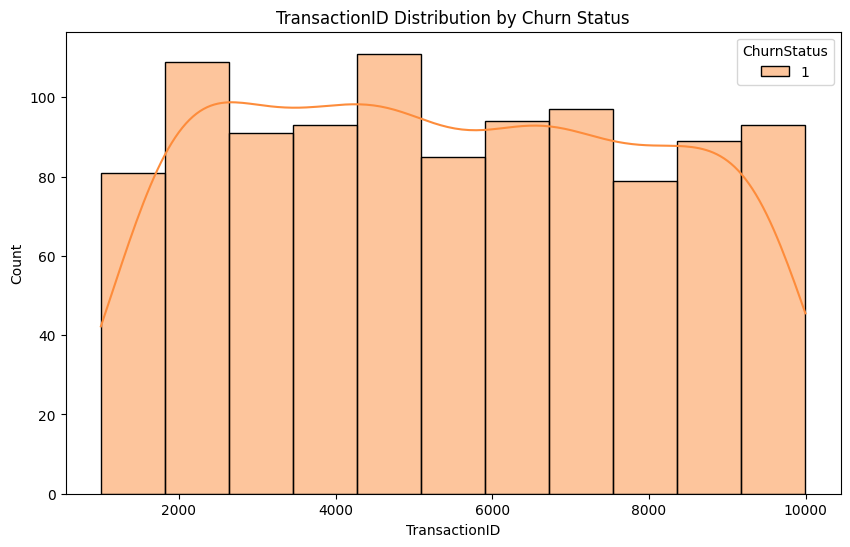

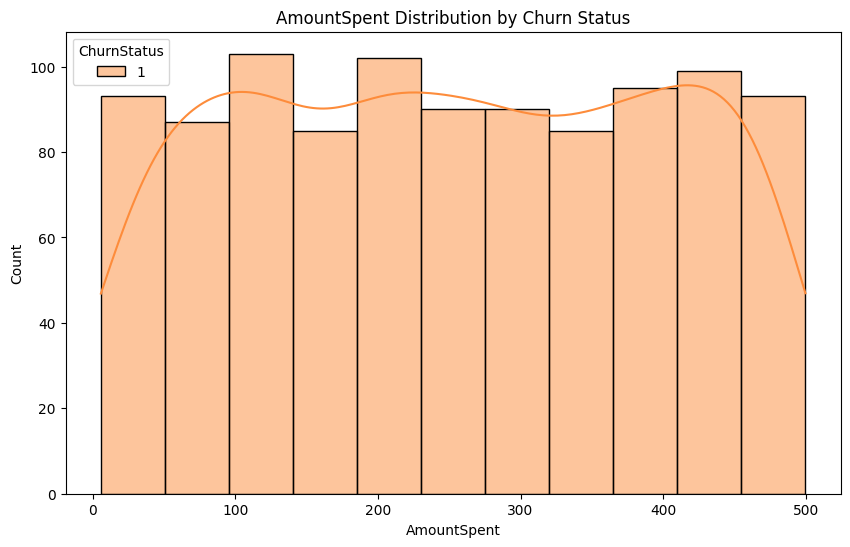

None


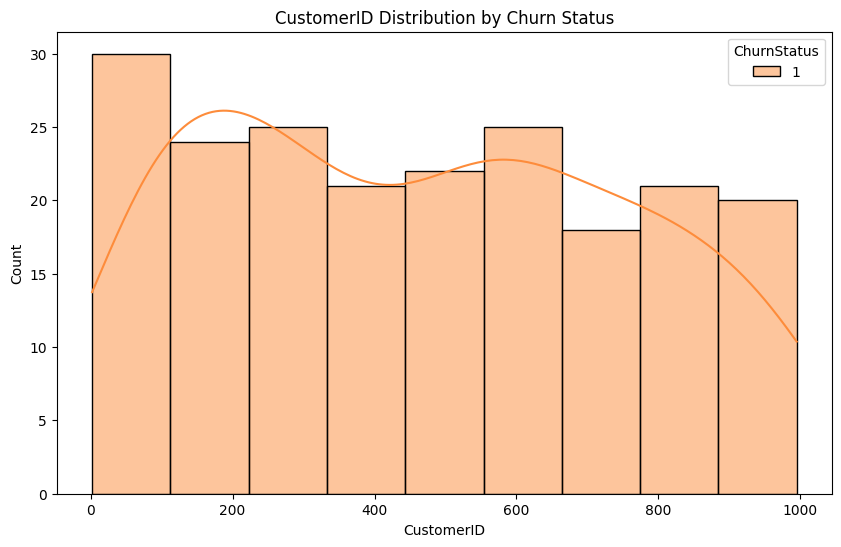

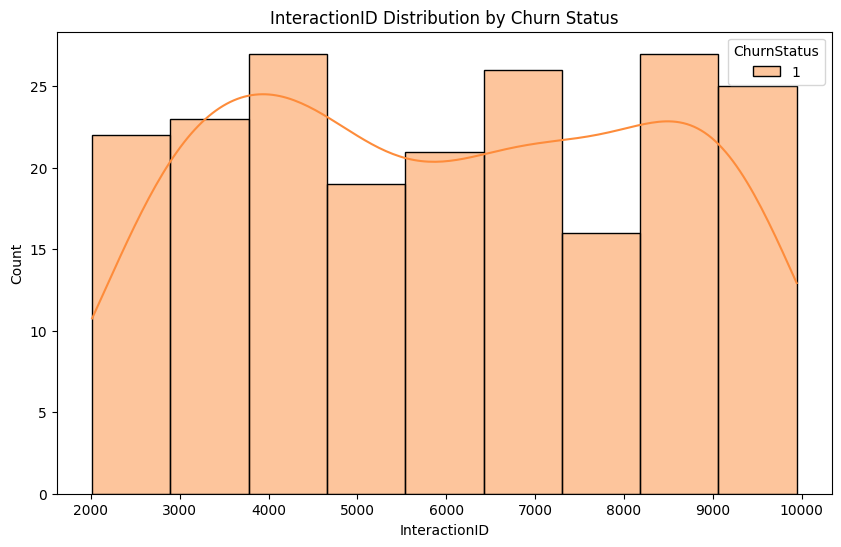

None


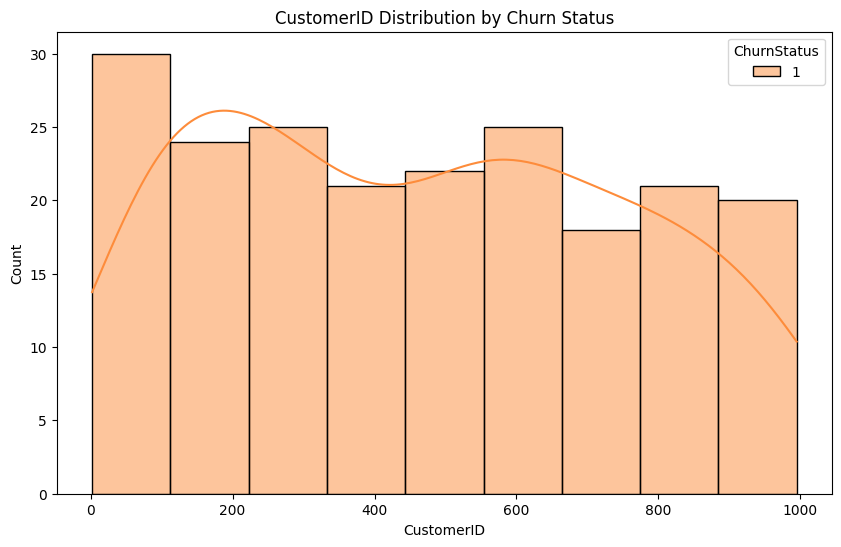

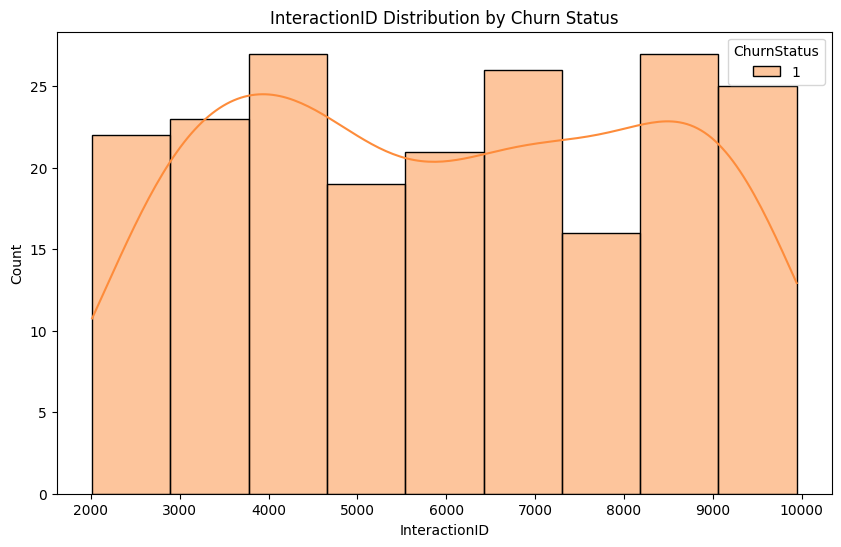

None


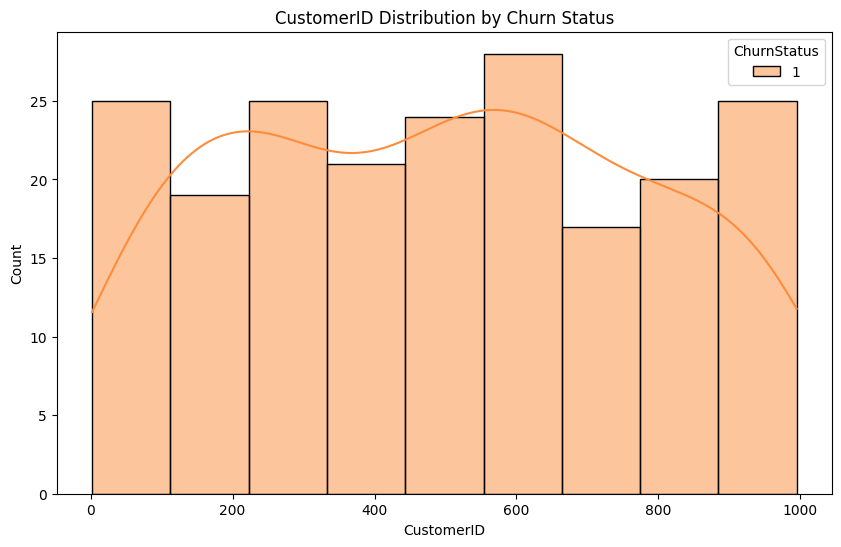

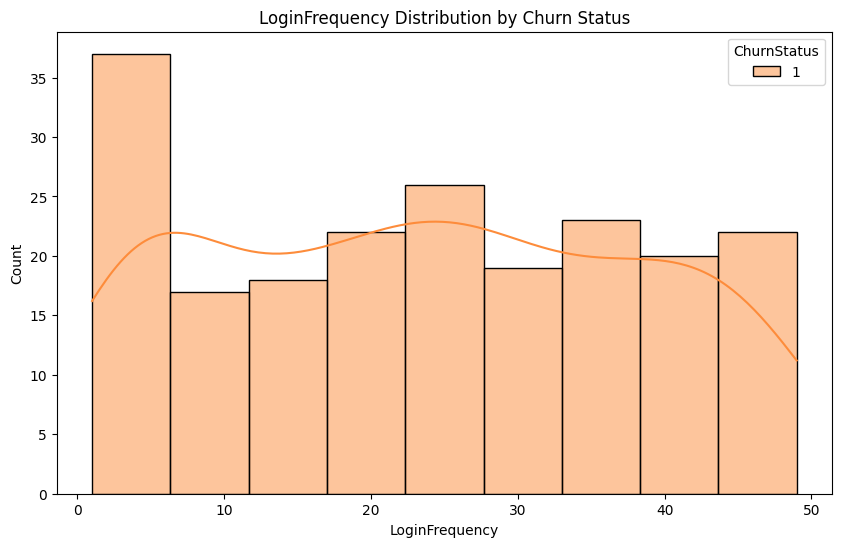

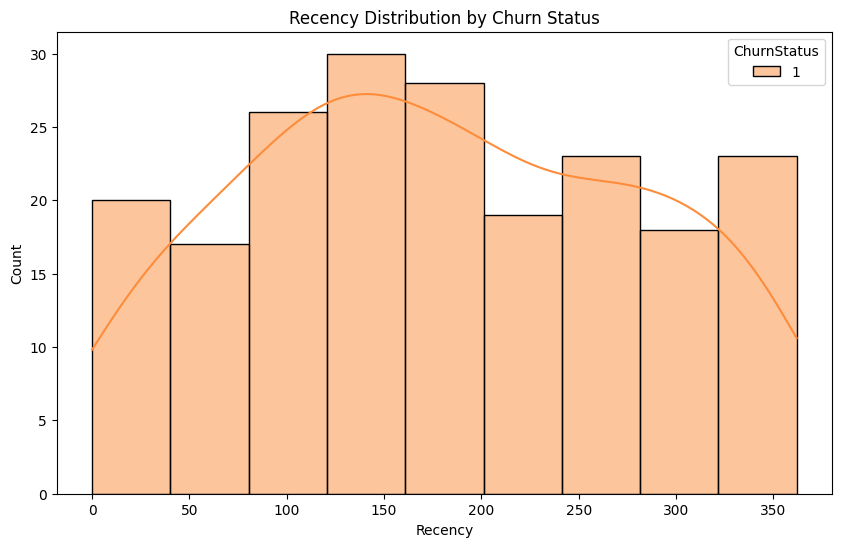

None


In [49]:
print(histogram_churn(merged_demographics_churn_data, 'Age'))
print(histogram_churn(merged_demographics_churn_data, 'IncomeLevel'))
print(histogram_churn(merged_demographics_churn_data, 'MaritalStatus'))
print(histogram_churn(merged_transaction_history_churn_data, 'AmountSpent'))
print(histogram_churn(merged_customer_service_churn_data, 'InteractionType'))
print(histogram_churn(merged_customer_service_churn_data, 'ResolutionStatus'))
print(histogram_churn(merged_online_activity_churn_data, 'ServiceUsage'))

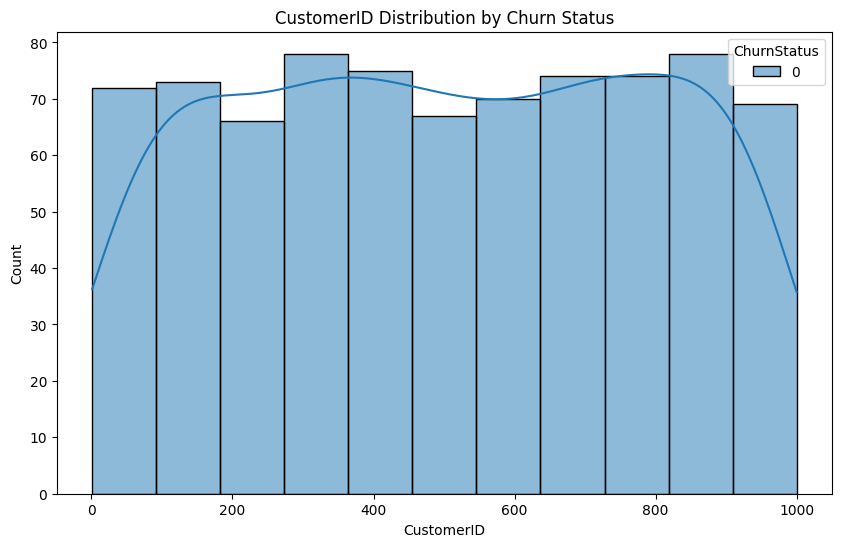

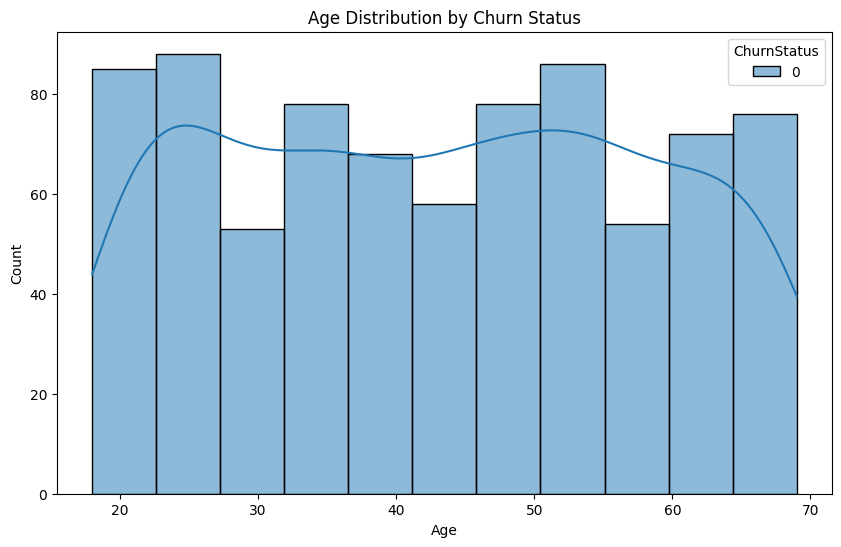

None


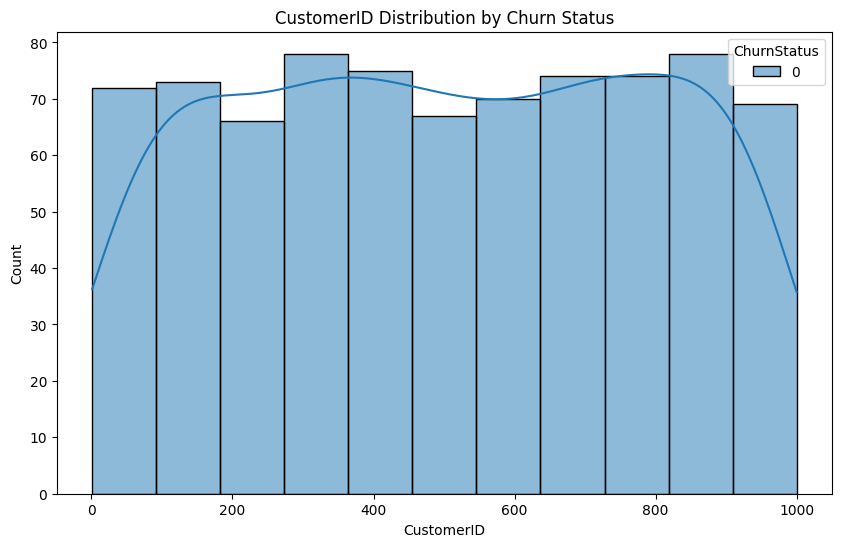

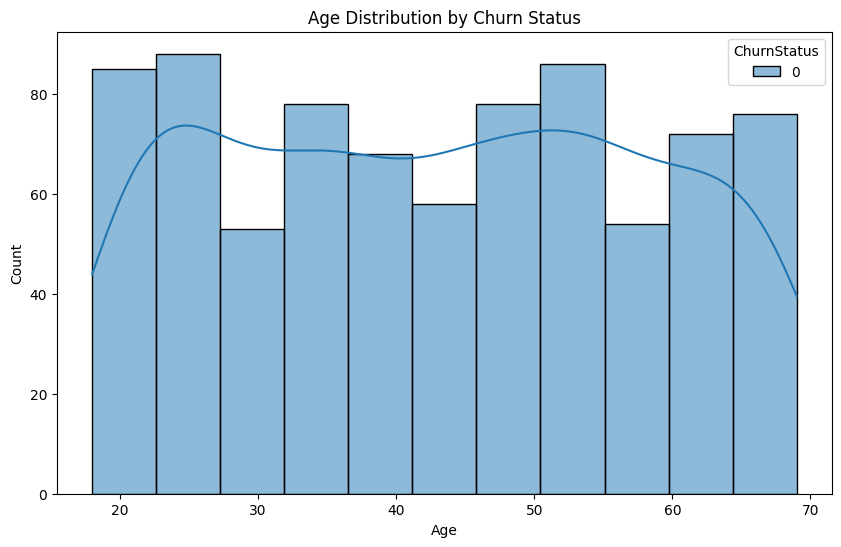

None


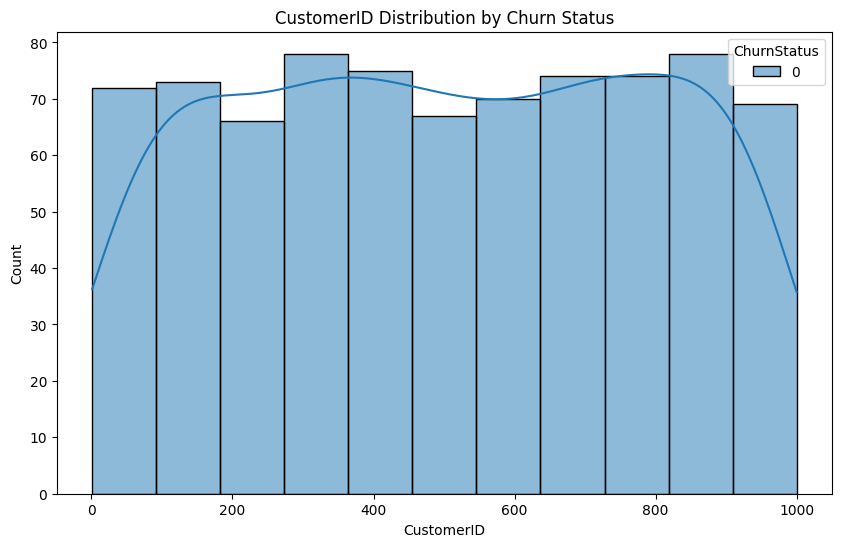

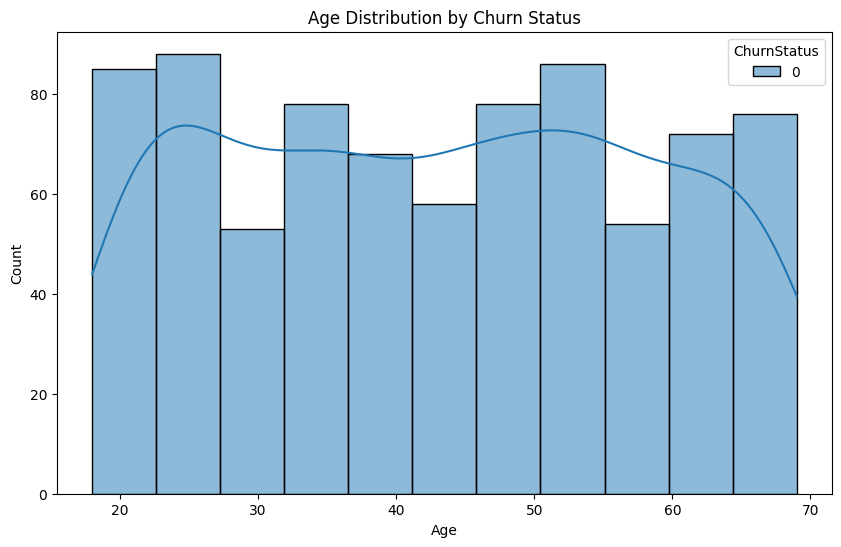

None


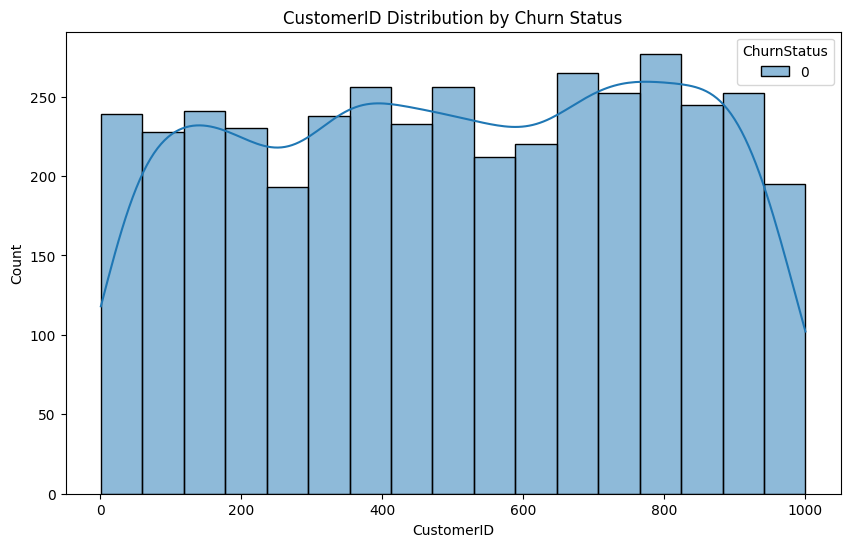

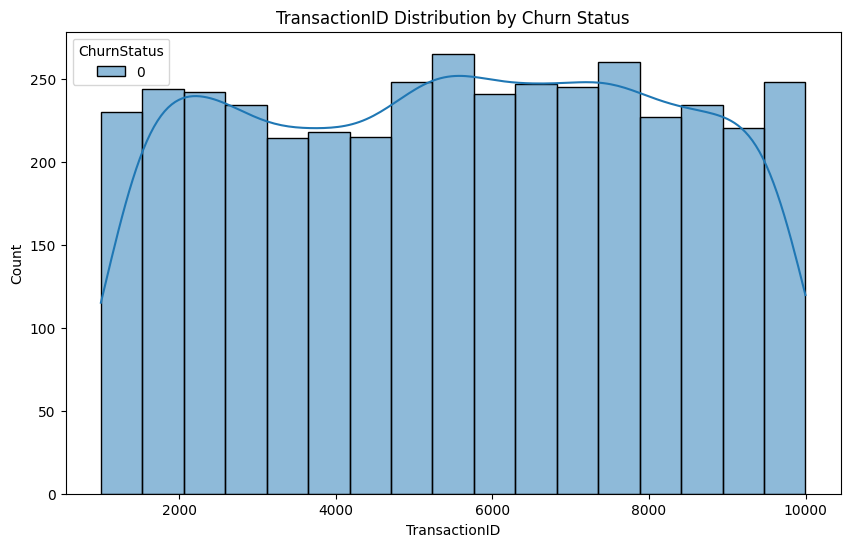

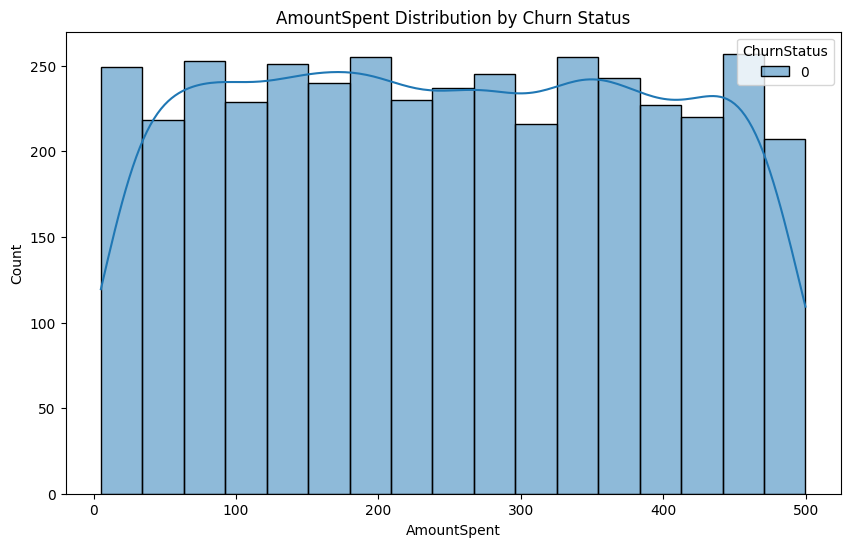

None


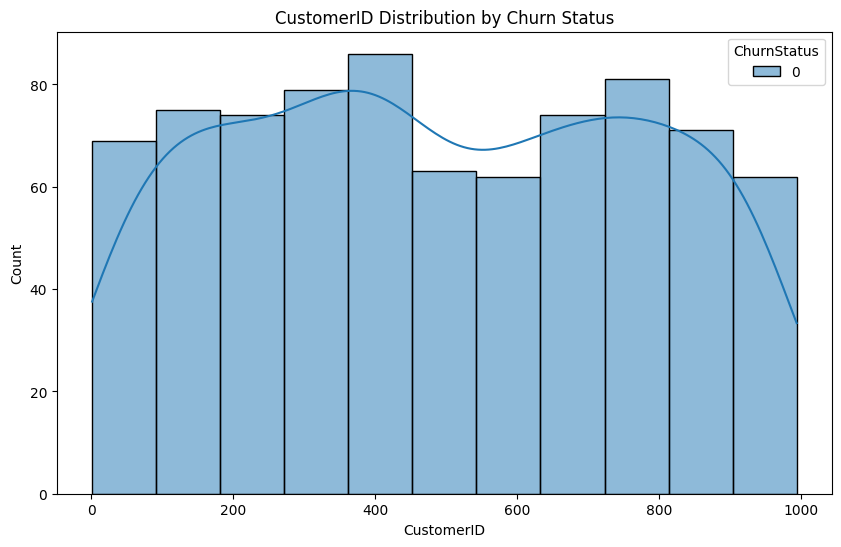

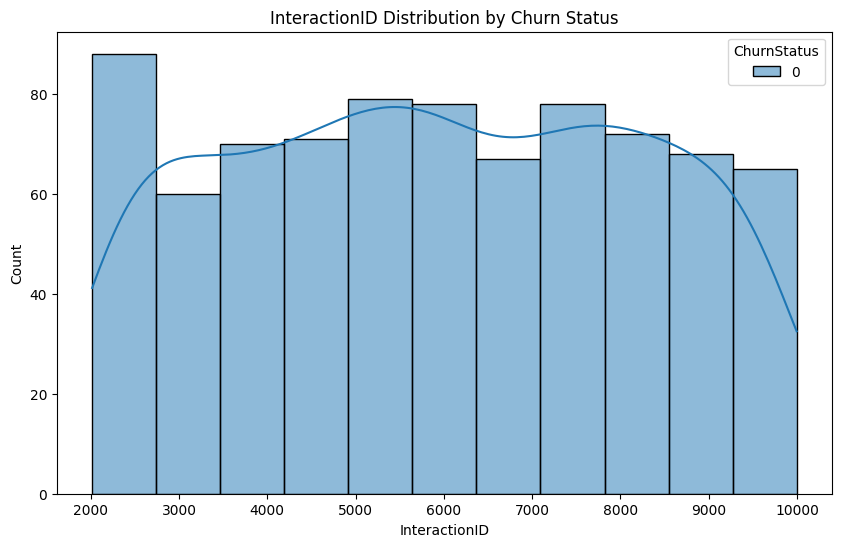

None


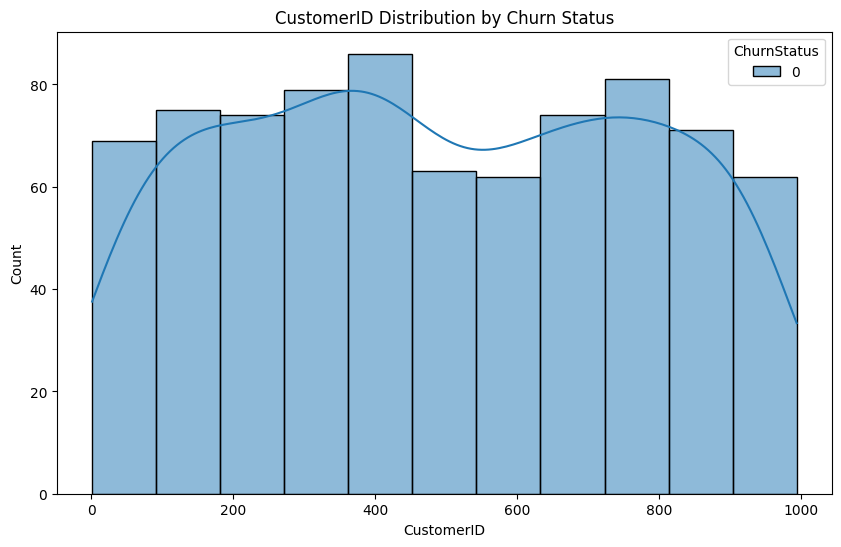

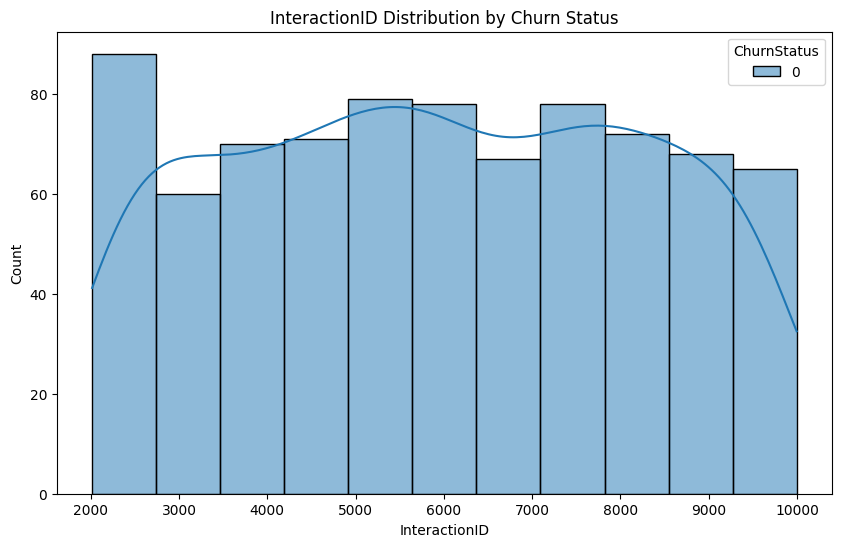

None


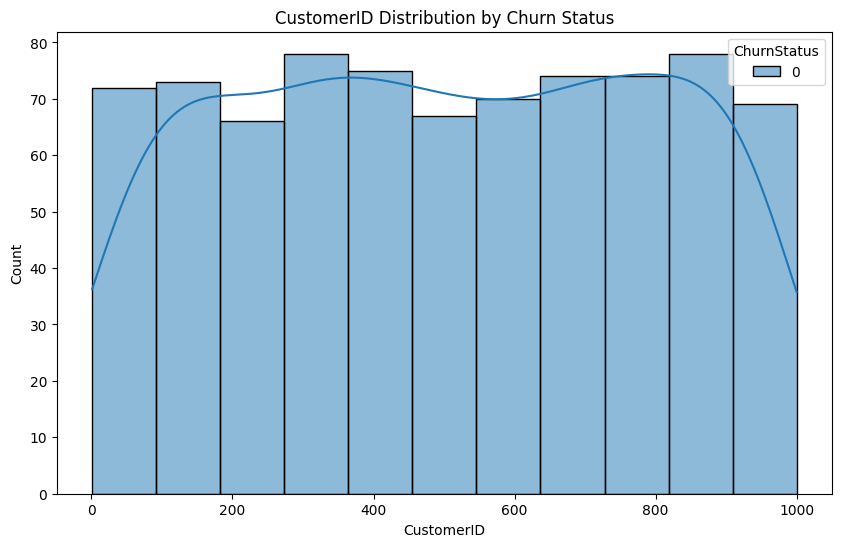

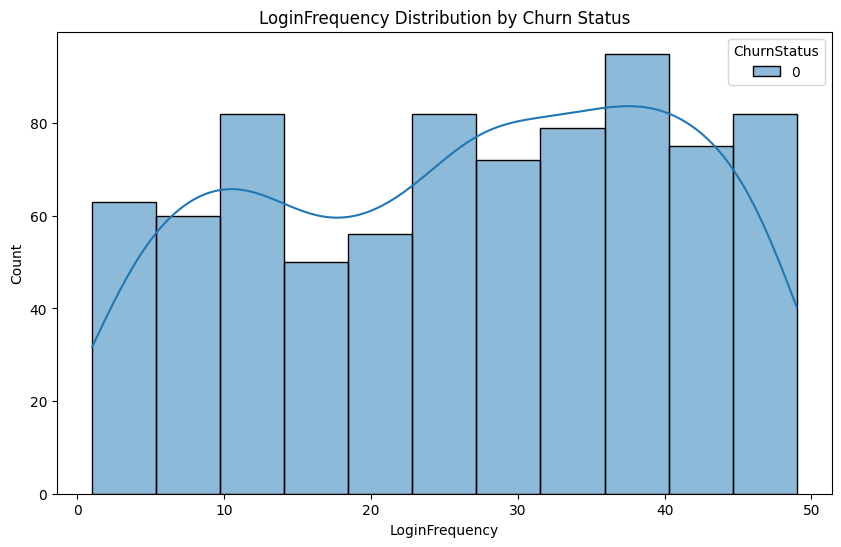

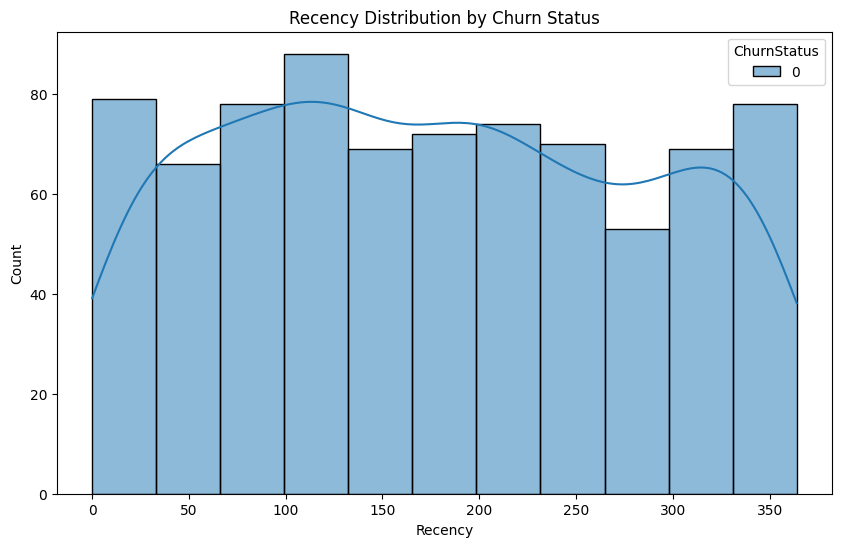

None


In [50]:
print(histogram_no_churn(merged_demographics_churn_data, 'Age'))
print(histogram_no_churn(merged_demographics_churn_data, 'IncomeLevel'))
print(histogram_no_churn(merged_demographics_churn_data, 'MaritalStatus'))
print(histogram_no_churn(merged_transaction_history_churn_data, 'AmountSpent'))
print(histogram_no_churn(merged_customer_service_churn_data, 'InteractionType'))
print(histogram_no_churn(merged_customer_service_churn_data, 'ResolutionStatus'))
print(histogram_no_churn(merged_online_activity_churn_data, 'ServiceUsage'))

# Data Cleaning for each data
1. Encoding
2. Missing values
3. Correlation - multicolinearity
4. Save then as csv files for machine learning analysis

In [51]:
def clean_and_encode(df, columns):
  """"
  Make sure to assign the columns as categories.
  Then use one-hot encoding to convert the categorical variables into numerical variables.
  Finally, replace True and False with 1 and 0.

  """
  df_cleaned = df.copy()
  for col in columns:
    df_cleaned[col] = df_cleaned[col].astype('category')
    df_cleaned = pd.get_dummies(df_cleaned, columns=[col])
    df_cleaned = df_cleaned.replace({True: 1, False: 0})
  return df_cleaned

def correlation_matrix(df):
  """
  Create a correlation matrix heatmap
  """
  corr_matrix = df.corr()
  fig, ax = plt.subplots(figsize=(10,10))
  heatmap = sns.heatmap(corr_matrix, cmap= 'YlGnBu', annot=True)
  plt.show()
  return heatmap

def to_csv(df, filename):
  """
  Save the dataframe as a csv file
  """
  df.to_csv(filename, index=False)
  return df

Cleaned Transaction History Merged Data
   CustomerID  TransactionID TransactionDate  AmountSpent  ChurnStatus  \
0           1           7194      2022-03-27       416.50            0   
1           2           7250      2022-08-08        54.96            1   
2           2           9660      2022-07-25       197.50            1   
3           2           2998      2022-01-25       101.31            1   
4           2           1228      2022-07-24       397.37            1   

   ProductCategory_Books  ProductCategory_Clothing  \
0                      0                         0   
1                      0                         1   
2                      0                         0   
3                      0                         0   
4                      0                         1   

   ProductCategory_Electronics  ProductCategory_Furniture  \
0                            1                          0   
1                            0                          0   
2      

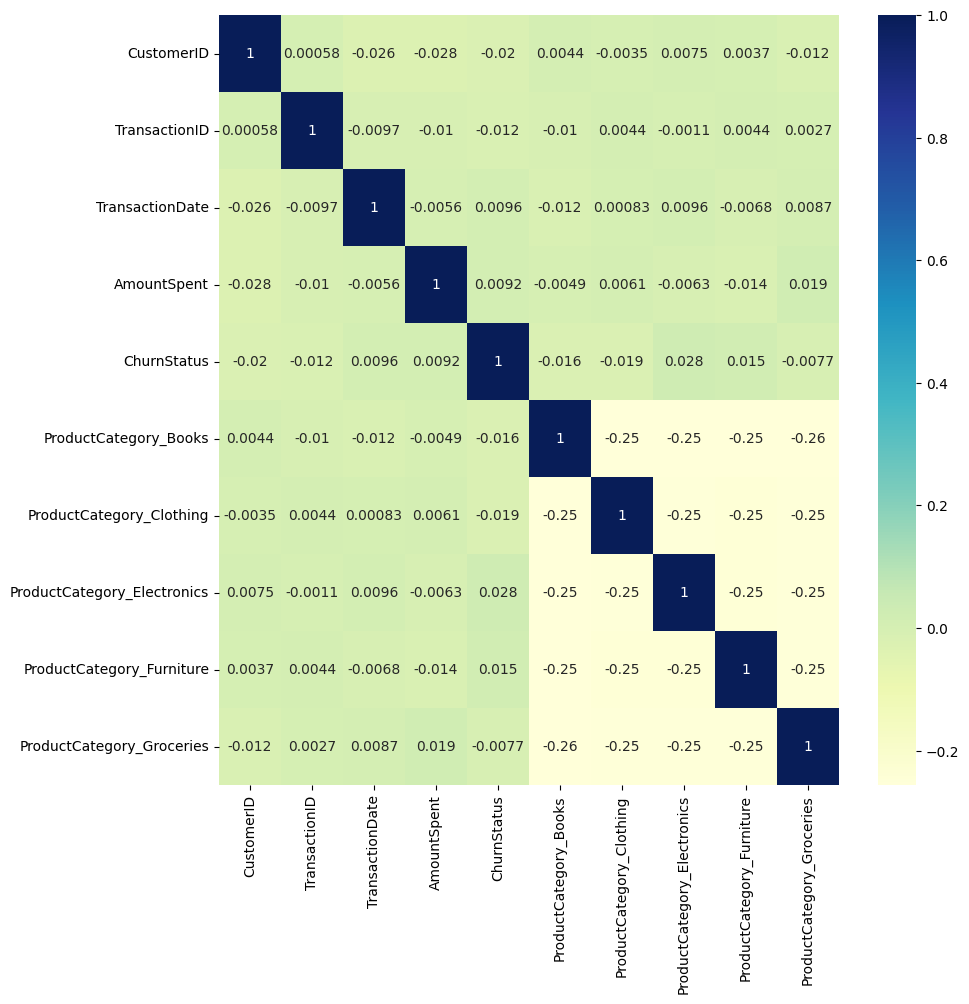

Axes(0.125,0.11;0.62x0.77)
Cleaned Online Activity Merged Data
   CustomerID LastLoginDate  LoginFrequency  ChurnStatus  Recency  \
0           1    2023-10-21              34            0       71   
1           2    2023-12-05               5            1       26   
2           3    2023-11-15               3            0       46   
3           4    2023-08-25               2            0      128   
4           5    2023-10-27              41            0       65   

   ServiceUsage_Mobile App  ServiceUsage_Online Banking  ServiceUsage_Website  
0                        1                            0                     0  
1                        0                            0                     1  
2                        0                            0                     1  
3                        0                            0                     1  
4                        0                            0                     1  


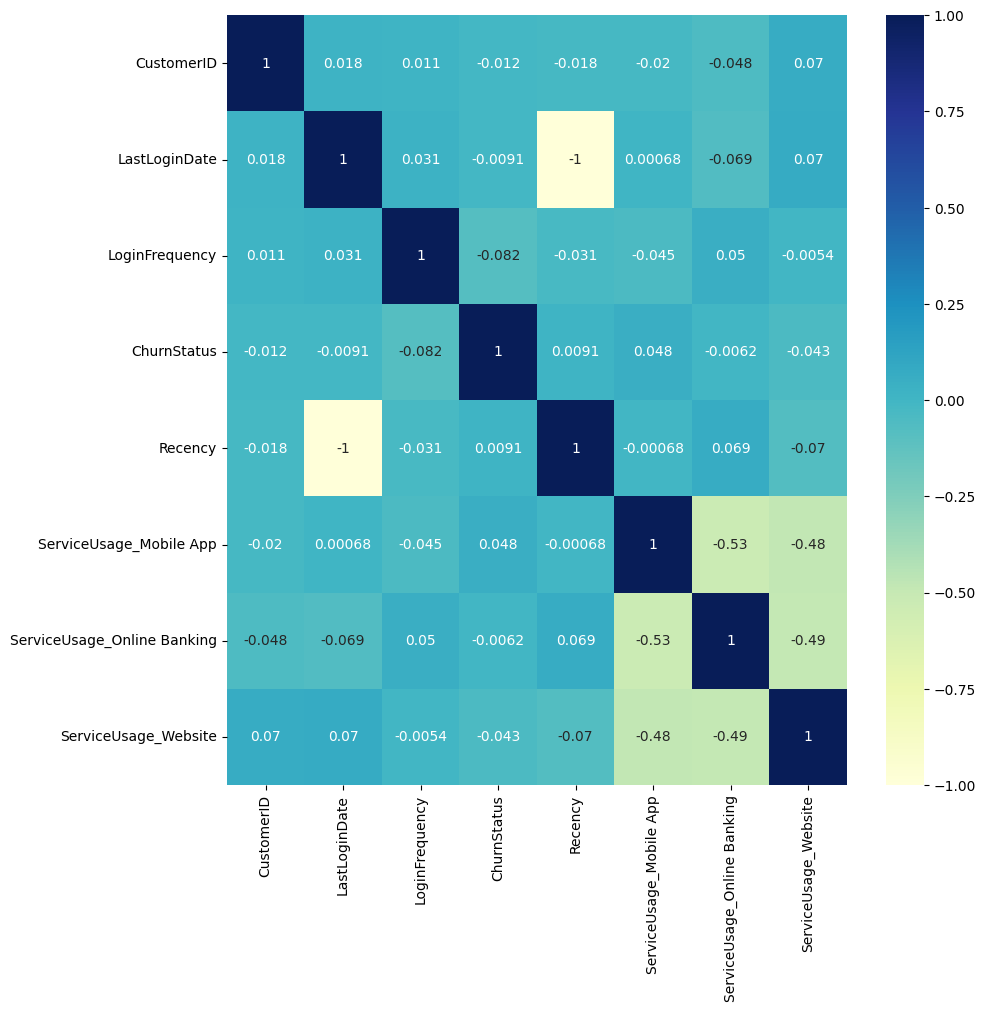

Axes(0.125,0.11;0.62x0.77)
Cleaned Customer Service Merged Data
   CustomerID  InteractionID InteractionDate  ChurnStatus  \
0           1           6363      2022-03-31            0   
1           2           3329      2022-03-17            1   
2           3           9976      2022-08-24            0   
3           4           7354      2022-11-18            0   
4           4           5393      2022-07-03            0   

   InteractionType_Complaint  InteractionType_Feedback  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   

   InteractionType_Inquiry  ResolutionStatus_Resolved  \
0                        1                          1   
1                        1                          1   
2                        1                       

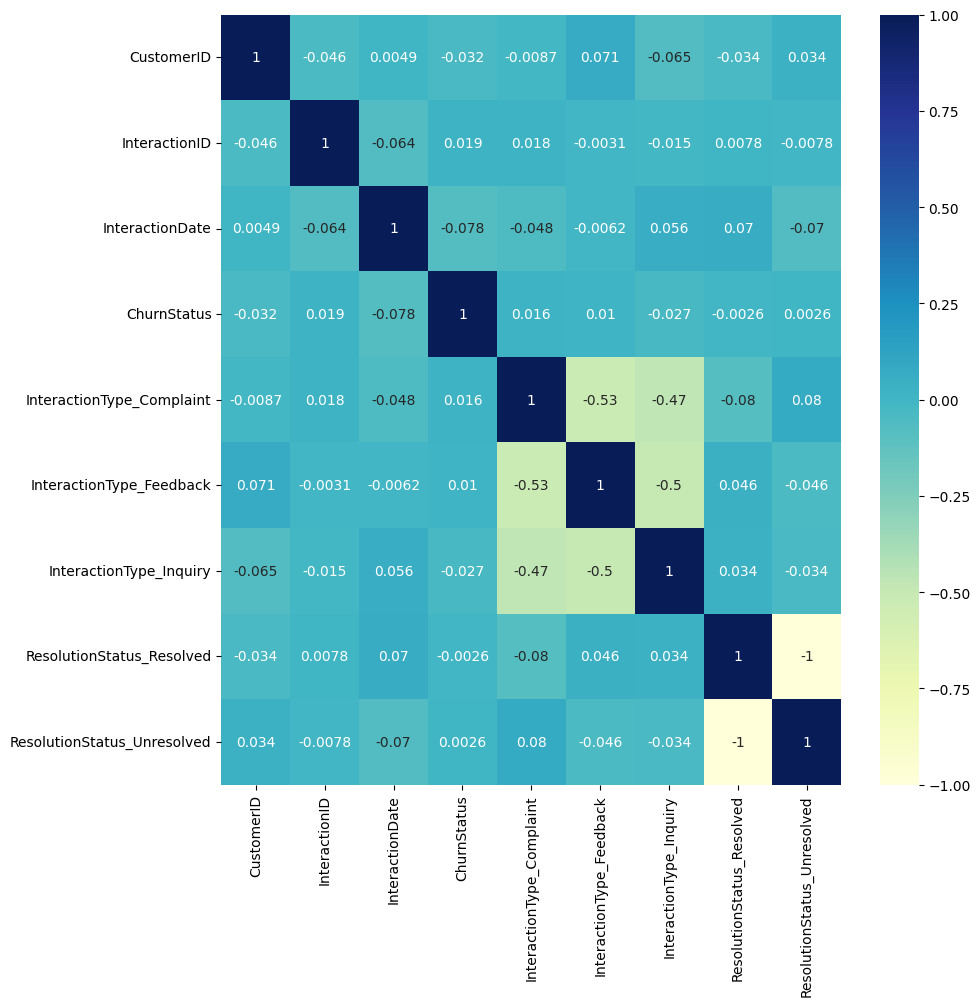

Axes(0.125,0.11;0.62x0.77)
Cleaned Demographics Merged Data
   CustomerID  Age  ChurnStatus  Gender_F  Gender_M  MaritalStatus_Divorced  \
0           1   62            0         0         1                       0   
1           2   65            1         0         1                       0   
2           3   18            0         0         1                       0   
3           4   21            0         0         1                       0   
4           5   21            0         0         1                       1   

   MaritalStatus_Married  MaritalStatus_Single  MaritalStatus_Widowed  \
0                      0                     1                      0   
1                      1                     0                      0   
2                      0                     1                      0   
3                      0                     0                      1   
4                      0                     0                      0   

   IncomeLevel_High  Incom

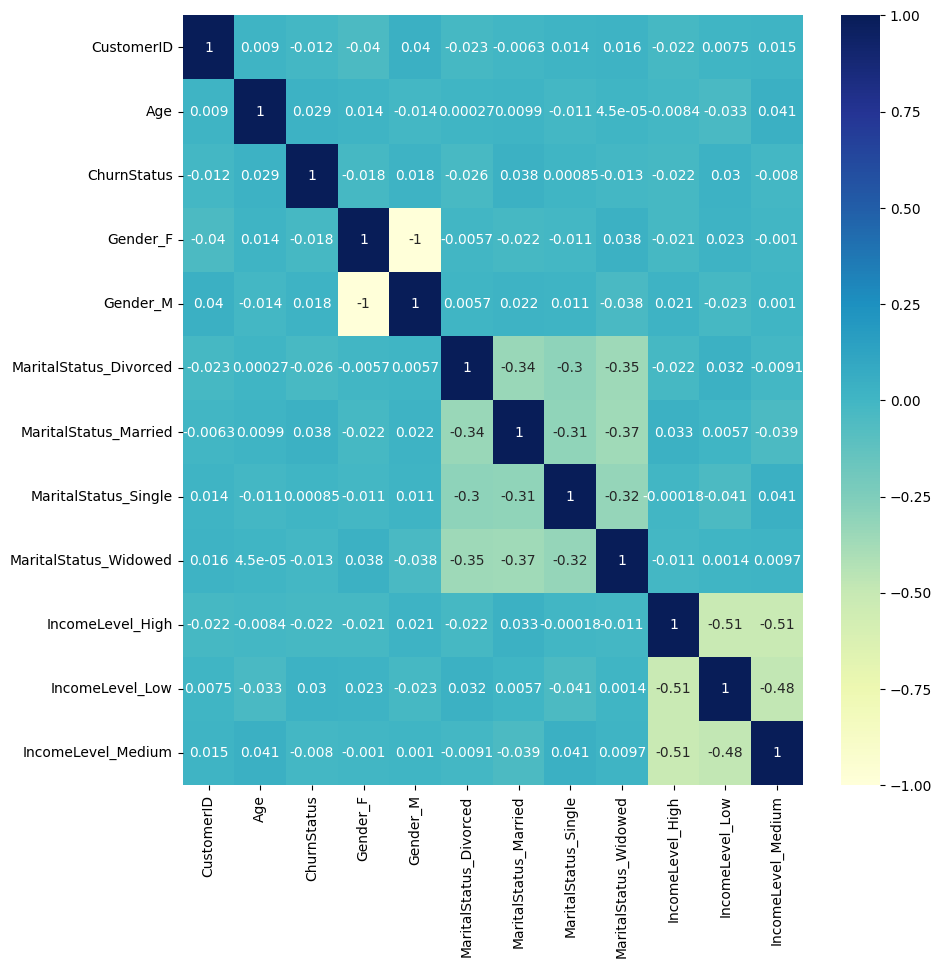

Axes(0.125,0.11;0.62x0.77)


In [52]:
merged_transaction_history_churn_data1 = clean_and_encode(merged_transaction_history_churn_data, ['ProductCategory'])
print("Cleaned Transaction History Merged Data")
print(merged_transaction_history_churn_data1.head())
print("Correlation matrix of Transaction History Merged Data")
print(correlation_matrix(merged_transaction_history_churn_data1))
# print("Saving Transaction History Merged Data as CSV")
# print(to_csv(merged_transaction_history_churn_data1, 'merged_transaction_history_churn_data.csv'))

merged_online_activity_churn_data1 = clean_and_encode(merged_online_activity_churn_data, ['ServiceUsage'])
print("Cleaned Online Activity Merged Data")
print(merged_online_activity_churn_data1.head())
print(correlation_matrix(merged_online_activity_churn_data1))
# print("Saving Online Activity Merged Data as CSV")
# print(to_csv(merged_online_activity_churn_data1, 'merged_online_activity_churn_data.csv'))

merged_customer_service_churn_data1 = clean_and_encode(merged_customer_service_churn_data, ['InteractionType', 'ResolutionStatus'])
print("Cleaned Customer Service Merged Data")
print(merged_customer_service_churn_data1.head())
print(correlation_matrix(merged_customer_service_churn_data1))
# print("Saving Customer Service Merged Data as CSV")
# print(to_csv(merged_customer_service_churn_data1, 'merged_customer_service_churn_data.csv'))

merged_demographics_churn_data1 = clean_and_encode(merged_demographics_churn_data, ['Gender', 'MaritalStatus', 'IncomeLevel'])
print("Cleaned Demographics Merged Data")
print(merged_demographics_churn_data1.head())
print(correlation_matrix(merged_demographics_churn_data1))
# print("Saving Demographics Merged Data as CSV")
# print(to_csv(merged_demographics_churn_data1, 'merged_demographics_churn_data.csv'))

## Aggregating the data sets into one and Creation of New Features

1. Aggregate One-to-Many Sheets
Before merging:

Transaction_History → aggregate by CustomerID: e.g., total spent, average spent, number of transactions.

Customer_Service → aggregate: number of interactions, resolution rate, last interaction.

This will transform them into one row per customer.


In [53]:
merged_transaction_history_churn_data2 = merged_transaction_history_churn_data1.groupby('CustomerID')['AmountSpent'].agg(['sum', 'mean', 'count']).reset_index()
merged_transaction_history_churn_data2.columns = ['CustomerID', 'TotalAmountSpent', 'AverageAmountSpent', 'NumberOfTransactions']
print(merged_transaction_history_churn_data2.head())

   CustomerID  TotalAmountSpent  AverageAmountSpent  NumberOfTransactions
0           1            416.50           416.50000                     1
1           2           1547.42           221.06000                     7
2           3           1702.98           283.83000                     6
3           4            917.29           183.45800                     5
4           5           2001.49           250.18625                     8


In [54]:
merged_customer_service_churn_data2 = merged_customer_service_churn_data.groupby('CustomerID').agg(
    number_of_interactions=('InteractionType', 'count'),
    last_interaction=('InteractionDate', 'max')
).reset_index()

resolved_interactions = merged_customer_service_churn_data[customer_service_data['ResolutionStatus'] == 'Resolved'].groupby('CustomerID').size()
merged_customer_service_churn_data2['resolved_interactions'] = merged_customer_service_churn_data2['CustomerID'].map(resolved_interactions).fillna(0)
merged_customer_service_churn_data2['resolution_rate'] = merged_customer_service_churn_data2['resolved_interactions'] / merged_customer_service_churn_data2['number_of_interactions']

print(merged_customer_service_churn_data2.head())

   CustomerID  number_of_interactions last_interaction  resolved_interactions  \
0           1                       1       2022-03-31                    1.0   
1           2                       1       2022-03-17                    1.0   
2           3                       1       2022-08-24                    1.0   
3           4                       2       2022-11-18                    1.0   
4           6                       1       2022-05-05                    1.0   

   resolution_rate  
0              1.0  
1              1.0  
2              1.0  
3              0.5  
4              1.0  


In [55]:
merged_customer_service_churn_data2.isnull().sum()

CustomerID                0
number_of_interactions    0
last_interaction          0
resolved_interactions     0
resolution_rate           0
dtype: int64

In [56]:
churn_predictive_data = (merged_demographics_churn_data
                         .merge(merged_transaction_history_churn_data2, on='CustomerID', how='left')
                         .merge(merged_customer_service_churn_data2, on='CustomerID', how='left')
                         .merge(merged_online_activity_churn_data, on='CustomerID', how='left')
                        )

print(churn_predictive_data.head())

   CustomerID  Age Gender MaritalStatus IncomeLevel  ChurnStatus_x  \
0           1   62      M        Single         Low              0   
1           2   65      M       Married         Low              1   
2           3   18      M        Single         Low              0   
3           4   21      M       Widowed         Low              0   
4           5   21      M      Divorced      Medium              0   

   TotalAmountSpent  AverageAmountSpent  NumberOfTransactions  \
0            416.50           416.50000                     1   
1           1547.42           221.06000                     7   
2           1702.98           283.83000                     6   
3            917.29           183.45800                     5   
4           2001.49           250.18625                     8   

   number_of_interactions last_interaction  resolved_interactions  \
0                     1.0       2022-03-31                    1.0   
1                     1.0       2022-03-17        

In [57]:
churn_predictive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CustomerID              1000 non-null   int64         
 1   Age                     1000 non-null   int64         
 2   Gender                  1000 non-null   object        
 3   MaritalStatus           1000 non-null   object        
 4   IncomeLevel             1000 non-null   object        
 5   ChurnStatus_x           1000 non-null   int64         
 6   TotalAmountSpent        1000 non-null   float64       
 7   AverageAmountSpent      1000 non-null   float64       
 8   NumberOfTransactions    1000 non-null   int64         
 9   number_of_interactions  668 non-null    float64       
 10  last_interaction        668 non-null    datetime64[ns]
 11  resolved_interactions   668 non-null    float64       
 12  resolution_rate         668 non-null    float64  

In [58]:
churn_predictive_data['resolved_interactions'].fillna(0, inplace=True)
churn_predictive_data['resolution_rate'].fillna(0, inplace=True)
churn_predictive_data.isnull().sum()

CustomerID                  0
Age                         0
Gender                      0
MaritalStatus               0
IncomeLevel                 0
ChurnStatus_x               0
TotalAmountSpent            0
AverageAmountSpent          0
NumberOfTransactions        0
number_of_interactions    332
last_interaction          332
resolved_interactions       0
resolution_rate             0
LastLoginDate               0
LoginFrequency              0
ServiceUsage                0
ChurnStatus_y               0
Recency                     0
dtype: int64

In [59]:
# is the ChurnStatus_x the same as ChurnStatus_y
verdict = churn_predictive_data['ChurnStatus_x'] == churn_predictive_data['ChurnStatus_y']
verdict.value_counts()

churn_predictive_data.drop(columns=['ChurnStatus_y'], inplace=True)
churn_predictive_data.rename(columns={'ChurnStatus_x': 'ChurnStatus'}, inplace=True)

In [60]:
#save it to csv
churn_predictive_data.to_csv('churn_predictive_data.csv', index=False)

Created a cleaned data since some features contained NaN values. This is because some customers didn't order a customer service that month.

In [61]:
churn_predictive_data_cleaned = churn_predictive_data.dropna()
churn_predictive_data_cleaned.isnull().sum()

CustomerID                0
Age                       0
Gender                    0
MaritalStatus             0
IncomeLevel               0
ChurnStatus               0
TotalAmountSpent          0
AverageAmountSpent        0
NumberOfTransactions      0
number_of_interactions    0
last_interaction          0
resolved_interactions     0
resolution_rate           0
LastLoginDate             0
LoginFrequency            0
ServiceUsage              0
Recency                   0
dtype: int64

In [62]:
churn_predictive_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 0 to 994
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CustomerID              668 non-null    int64         
 1   Age                     668 non-null    int64         
 2   Gender                  668 non-null    object        
 3   MaritalStatus           668 non-null    object        
 4   IncomeLevel             668 non-null    object        
 5   ChurnStatus             668 non-null    int64         
 6   TotalAmountSpent        668 non-null    float64       
 7   AverageAmountSpent      668 non-null    float64       
 8   NumberOfTransactions    668 non-null    int64         
 9   number_of_interactions  668 non-null    float64       
 10  last_interaction        668 non-null    datetime64[ns]
 11  resolved_interactions   668 non-null    float64       
 12  resolution_rate         668 non-null    float64       


In [63]:
#save the cleaned data to csv
churn_predictive_data_cleaned.to_csv('churn_predictive_data_cleaned.csv', index=False)

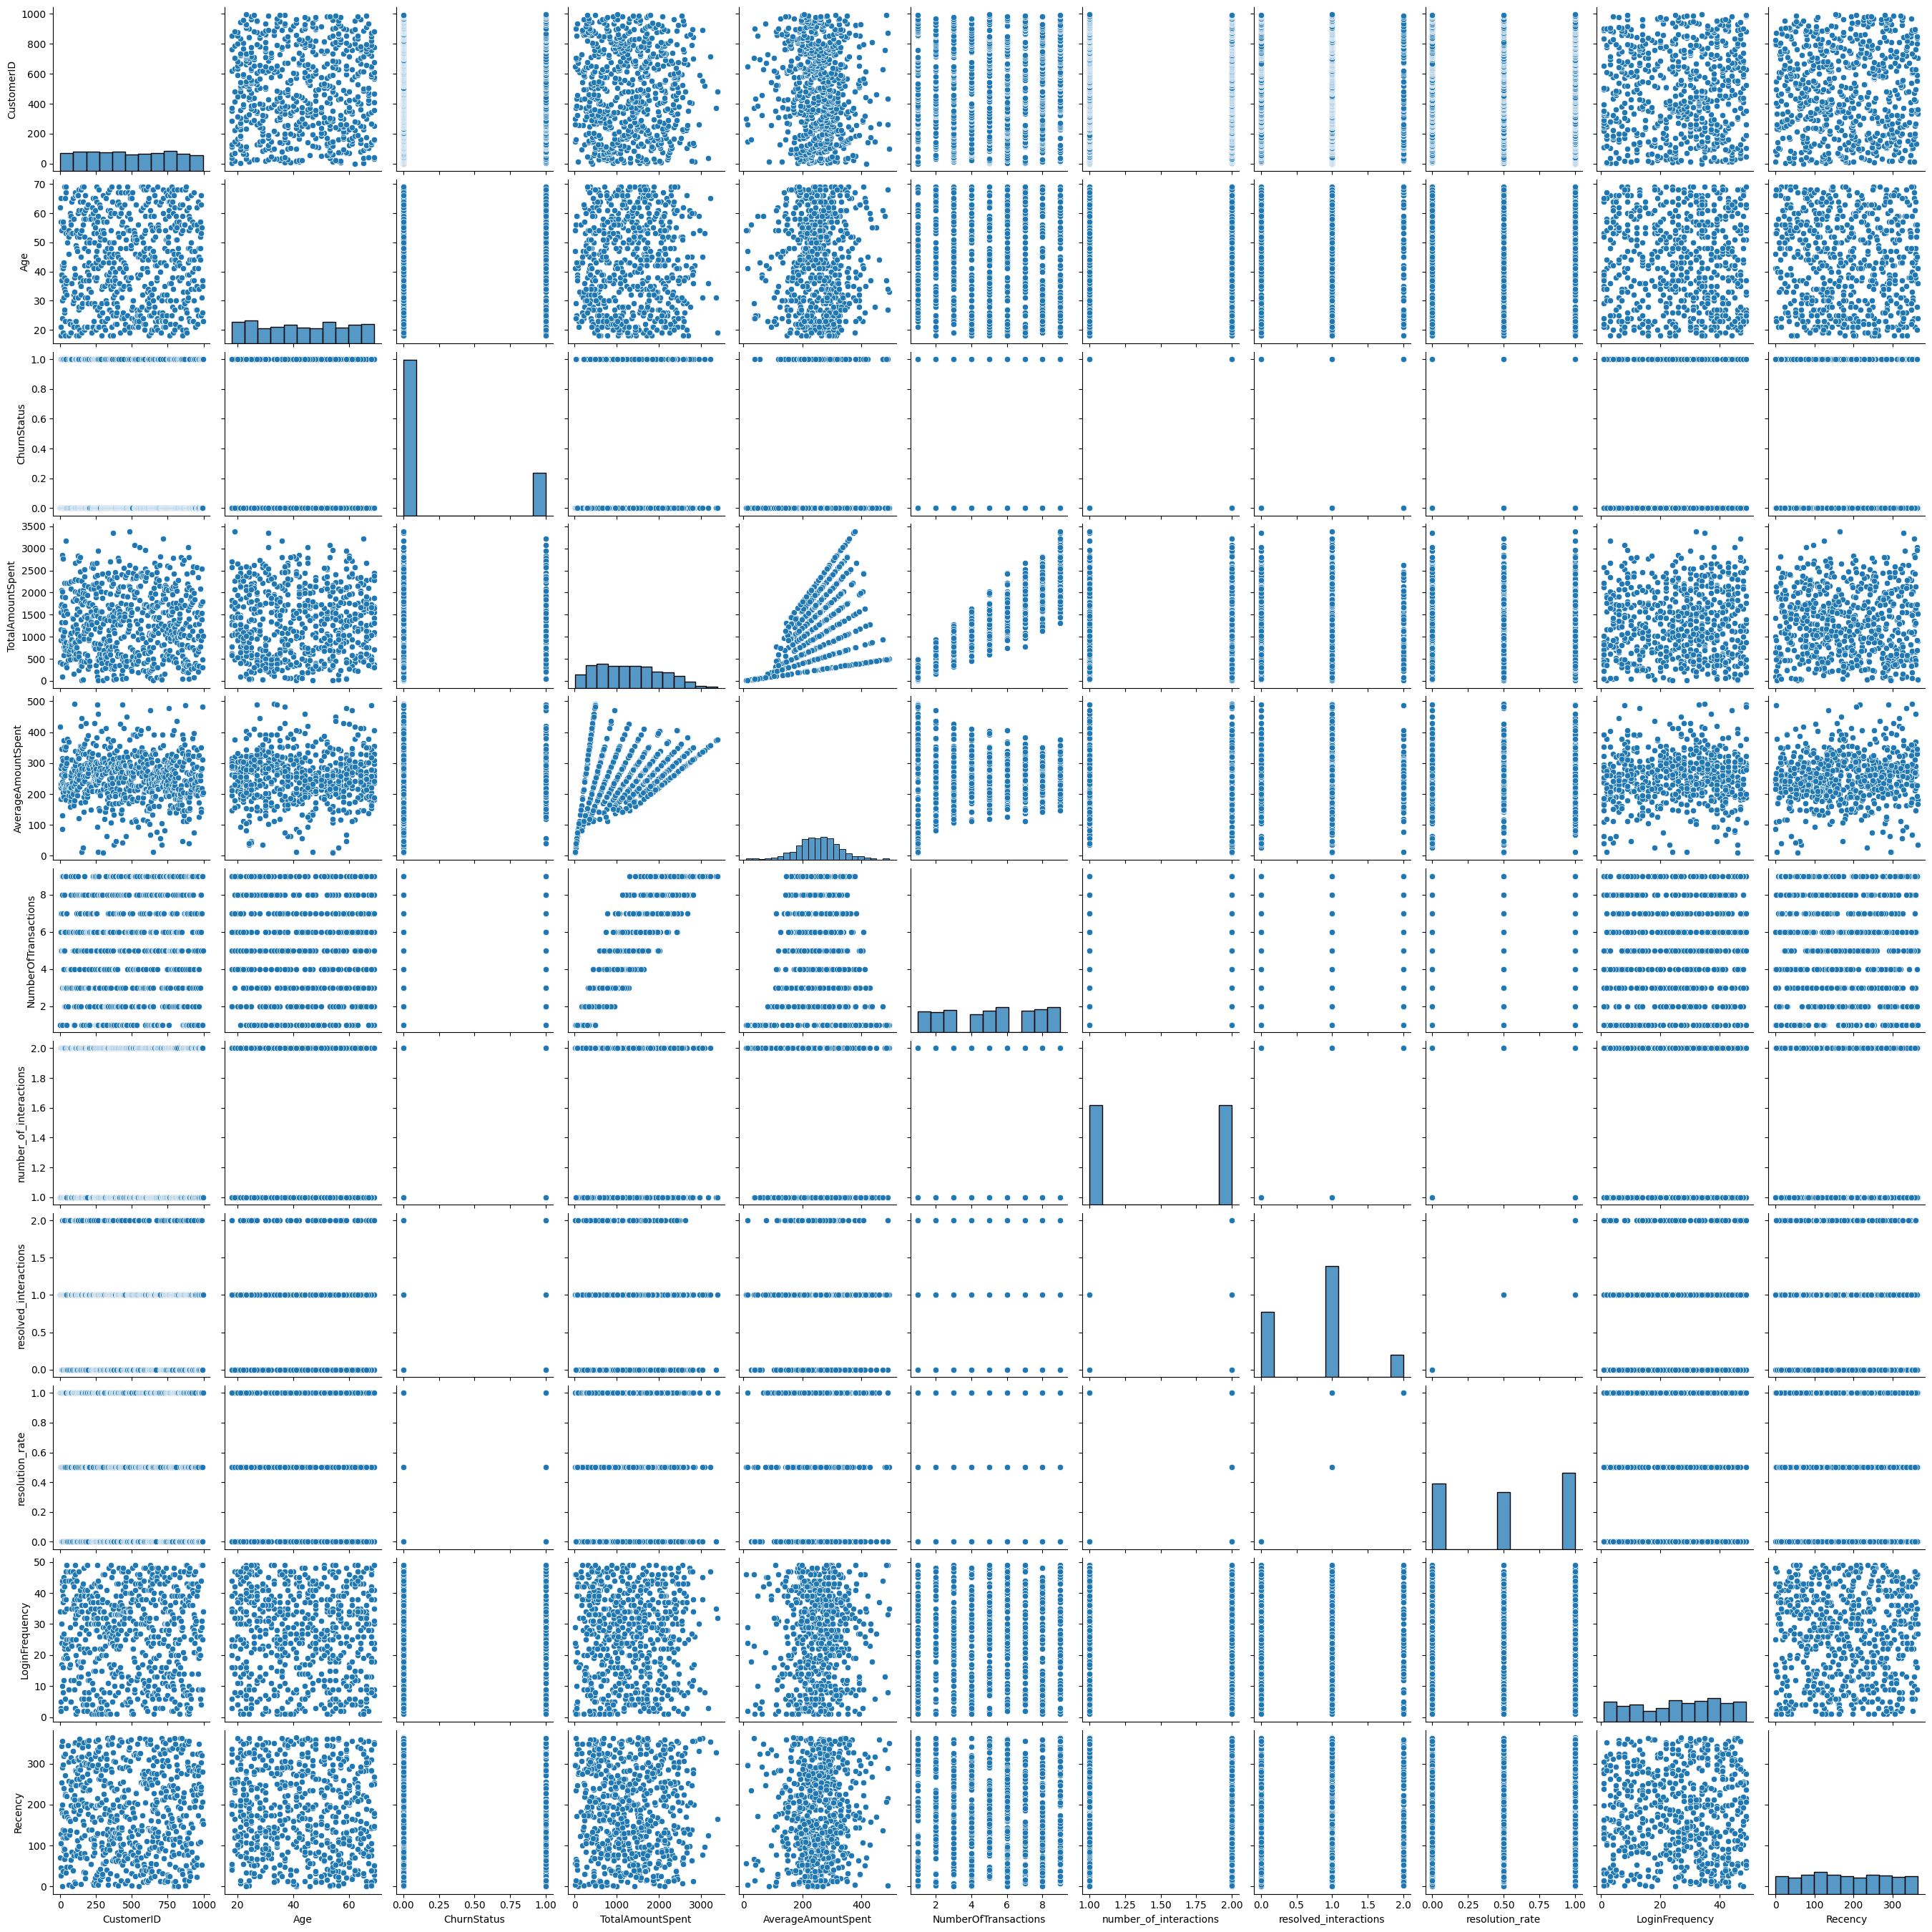

In [64]:
sns.pairplot(churn_predictive_data_cleaned)

There is no linear correlation between most features. Therefore, there is no multicolinearity.